# Steel Defect Detection:


 Steel is one of the most important building materials of modern times. Steel buildings are resistant to natural and man-made wear which has made the material ubiquitous around the world. To help make production of steel more efficient, this competition will help identify defects

# Problem statement :

This competition is a two-fold competition: classify the type of steel defect, and also segment the parts of the image that contain the defect.

# Import Libraries

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as profile
from collections import Counter
import dabl
pd.set_option('max_columns', 100)

# Import Data

In [132]:
data = pd.read_csv('E:\Downlload\SteelDetection.csv')
data.head(10)

X_Minimum  X_Maximum  Y_Minimum  Y_Maximum  Pixels_Areas  X_Perimeter  \
0         42         50     270900     270944           267           17   
1        645        651    2538079    2538108           108           10   
2        829        835    1553913    1553931            71            8   
3        853        860     369370     369415           176           13   
4       1289       1306     498078     498335          2409           60   
5        430        441     100250     100337           630           20   
6        413        446     138468     138883          9052          230   
7        190        200     210936     210956           132           11   
8        330        343     429227     429253           264           15   
9         74         90     779144     779308          1506           46   

   Y_Perimeter  Sum_of_Luminosity  Minimum_of_Luminosity  \
0           44              24220                     76   
1           30              11397                     84   
2           19               7972                     99   
3           45              18996                     99   
4          260             246930                     37   
5           87              62357                     64   
6          432            1481991                     23   
7           20              20007                    124   
8           26              29748                     53   
9          167             180215                     53   

   Maximum_of_Luminosity  Length_of_Conveyer  TypeOfSteel_A300  \
0                    108                1687                 1   
1                    123                1687                 1   
2                    125                1623                 1   
3                    126                1353                 0   
4                    126                1353                 0   
5                    127                1387                 0   
6                    199                1687                 0   
7                    172                1687                 0   
8                    148                1687                 0   
9                    143                1687                 0   

   TypeOfSteel_A400  Steel_Plate_Thickness  Edges_Index  Empty_Index  \
0                 0                     80       0.0498       0.2415   
1                 0                     80       0.7647       0.3793   
2                 0                    100       0.9710       0.3426   
3                 1                    290       0.7287       0.4413   
4                 1                    185       0.0695       0.4486   
5                 1                     40       0.6200       0.3417   
6                 1                    150       0.4896       0.3390   
7                 1                    150       0.2253       0.3400   
8                 1                    150       0.3912       0.2189   
9                 1                    150       0.0877       0.4261   

   Square_Index  Outside_X_Index  Edges_X_Index  Edges_Y_Index  \
0        0.1818           0.0047         0.4706         1.0000   
1        0.2069           0.0036         0.6000         0.9667   
2        0.3333           0.0037         0.7500         0.9474   
3        0.1556           0.0052         0.5385         1.0000   
4        0.0662           0.0126         0.2833         0.9885   
5        0.1264           0.0079         0.5500         1.0000   
6        0.0795           0.0196         0.1435         0.9607   
7        0.5000           0.0059         0.9091         1.0000   
8        0.5000           0.0077         0.8667         1.0000   
9        0.0976           0.0095         0.3478         0.9820   

   Outside_Global_Index  LogOfAreas  Log_X_Index  Log_Y_Index  \
0                   1.0      2.4265       0.9031       1.6435   
1                   1.0      2.0334       0.7782       1.4624   
2                   1.0      1.8513       0.7782       1.2553  

In [10]:
data.shape

(1941, 34)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X_Minimum              1941 non-null   int64  
 1   X_Maximum              1941 non-null   int64  
 2   Y_Minimum              1941 non-null   int64  
 3   Y_Maximum              1941 non-null   int64  
 4   Pixels_Areas           1941 non-null   int64  
 5   X_Perimeter            1941 non-null   int64  
 6   Y_Perimeter            1941 non-null   int64  
 7   Sum_of_Luminosity      1941 non-null   int64  
 8   Minimum_of_Luminosity  1941 non-null   int64  
 9   Maximum_of_Luminosity  1941 non-null   int64  
 10  Length_of_Conveyer     1941 non-null   int64  
 11  TypeOfSteel_A300       1941 non-null   int64  
 12  TypeOfSteel_A400       1941 non-null   int64  
 13  Steel_Plate_Thickness  1941 non-null   int64  
 14  Edges_Index            1941 non-null   float64
 15  Empt

In [23]:
data.isnull().sum()

X_Minimum                0
X_Maximum                0
Y_Minimum                0
Y_Maximum                0
Pixels_Areas             0
X_Perimeter              0
Y_Perimeter              0
Sum_of_Luminosity        0
Minimum_of_Luminosity    0
Maximum_of_Luminosity    0
Length_of_Conveyer       0
TypeOfSteel_A300         0
TypeOfSteel_A400         0
Steel_Plate_Thickness    0
Edges_Index              0
Empty_Index              0
Square_Index             0
Outside_X_Index          0
Edges_X_Index            0
Edges_Y_Index            0
Outside_Global_Index     0
LogOfAreas               0
Log_X_Index              0
Log_Y_Index              0
Orientation_Index        0
Luminosity_Index         0
SigmoidOfAreas           0
Pastry                   0
Z_Scratch                0
K_Scatch                 0
Stains                   0
Dirtiness                0
Bumps                    0
Other_Faults             0
dtype: int64

In [27]:
data.describe()

X_Minimum    X_Maximum     Y_Minimum     Y_Maximum   Pixels_Areas  \
count  1941.000000  1941.000000  1.941000e+03  1.941000e+03    1941.000000   
mean    571.136012   617.964451  1.650685e+06  1.650739e+06    1893.878413   
std     520.690671   497.627410  1.774578e+06  1.774590e+06    5168.459560   
min       0.000000     4.000000  6.712000e+03  6.724000e+03       2.000000   
25%      51.000000   192.000000  4.712530e+05  4.712810e+05      84.000000   
50%     435.000000   467.000000  1.204128e+06  1.204136e+06     174.000000   
75%    1053.000000  1072.000000  2.183073e+06  2.183084e+06     822.000000   
max    1705.000000  1713.000000  1.298766e+07  1.298769e+07  152655.000000   

        X_Perimeter   Y_Perimeter  Sum_of_Luminosity  Minimum_of_Luminosity  \
count   1941.000000   1941.000000       1.941000e+03            1941.000000   
mean     111.855229     82.965997       2.063121e+05              84.548686   
std      301.209187    426.482879       5.122936e+05              32.134276   
min        2.000000      1.000000       2.500000e+02               0.000000   
25%       15.000000     13.000000       9.522000e+03              63.000000   
50%       26.000000     25.000000       1.920200e+04              90.000000   
75%       84.000000     83.000000       8.301100e+04             106.000000   
max    10449.000000  18152.000000       1.159141e+07             203.000000   

       Maximum_of_Luminosity  Length_of_Conveyer  TypeOfSteel_A300  \
count            1941.000000         1941.000000       1941.000000   
mean              130.193715         1459.160227          0.400309   
std                18.690992          144.577823          0.490087   
min                37.000000         1227.000000          0.000000   
25%               124.000000         1358.000000          0.000000   
50%               127.000000         1364.000000          0.000000   
75%               140.000000         1650.000000          1.000000   
max               253.000000         1794.000000          1.000000   

       TypeOfSteel_A400  Steel_Plate_Thickness  Edges_Index  Empty_Index  \
count       1941.000000            1941.000000  1941.000000  1941.000000   
mean           0.599691              78.737764     0.331715     0.414203   
std            0.490087              55.086032     0.299712     0.137261   
min            0.000000              40.000000     0.000000     0.000000   
25%            0.000000              40.000000     0.060400     0.315800   
50%            1.000000              70.000000     0.227300     0.412100   
75%            1.000000              80.000000     0.573800     0.501600   
max            1.000000             300.000000     0.995200     0.943900   

       Square_Index  Outside_X_Index  Edges_X_Index  Edges_Y_Index  \
count   1941.000000      1941.000000    1941.000000    1941.000000   
mean       0.570767         0.033361       0.610529       0.813472   
std        0.271058         0.058961       0.243277       0.234274   
min        0.008300         0.001500       0.014400       0.048400   
25%        0.361300         0.006600       0.411800       0.596800   
50%        0.555600         0.010100       0.636400       0.947400   
75%        0.818200         0.023500       0.800000       1.000000   
max        1.000000         0.875900       1.000000       1.000000   

       Outside_Global_Index   LogOfAreas  Log_X_Index  Log_Y_Index  \
count           1941.000000  1941.000000  1941.000000  1941.000000   
mean               0.575734     2.492388     1.335686     1.403271   
std                0.482352     0.788930     0.481612     0.454345   
min                0.000000     0.301000     0.301000     0.000000   
25%                0.000000     1.924300     1.000000     1.079200   
50%                1.000000     2.240600     1.176100     1.322200   
75%                1.000000     2.914900     1.518500     1.732400   
max                1.000000     5.183700     3.074100     4.258700   

       Orientati

In [40]:
data.corr()

X_Minimum  X_Maximum  Y_Minimum  Y_Maximum  \
X_Minimum               1.000000   0.988314   0.041821   0.041807   
X_Maximum               0.988314   1.000000   0.052147   0.052135   
Y_Minimum               0.041821   0.052147   1.000000   1.000000   
Y_Maximum               0.041807   0.052135   1.000000   1.000000   
Pixels_Areas           -0.307322  -0.225399   0.017670   0.017840   
X_Perimeter            -0.258937  -0.186326   0.023843   0.024038   
Y_Perimeter            -0.118757  -0.090138   0.024150   0.024380   
Sum_of_Luminosity      -0.339045  -0.247052   0.007362   0.007499   
Minimum_of_Luminosity   0.237637   0.168649  -0.065703  -0.065733   
Maximum_of_Luminosity  -0.075554  -0.062392  -0.067785  -0.067776   
Length_of_Conveyer      0.316662   0.299390  -0.049211  -0.049219   
TypeOfSteel_A300        0.144319   0.112009   0.075164   0.075151   
TypeOfSteel_A400       -0.144319  -0.112009  -0.075164  -0.075151   
Steel_Plate_Thickness   0.136625   0.106119  -0.207640  -0.207644   
Edges_Index             0.278075   0.242846   0.021314   0.021300   
Empty_Index            -0.198461  -0.152680  -0.043117  -0.043085   
Square_Index            0.063658   0.048575  -0.006135  -0.006152   
Outside_X_Index        -0.361160  -0.214930   0.054165   0.054185   
Edges_X_Index           0.154778   0.149259   0.066085   0.066051   
Edges_Y_Index           0.367907   0.271915  -0.036543  -0.036549   
Outside_Global_Index    0.147282   0.099253  -0.062911  -0.062901   
LogOfAreas             -0.428553  -0.332169   0.044952   0.044994   
Log_X_Index            -0.437944  -0.324012   0.070406   0.070432   
Log_Y_Index            -0.326851  -0.265990  -0.008442  -0.008382   
Orientation_Index       0.178585   0.115019  -0.086497  -0.086480   
Luminosity_Index       -0.031578  -0.038996  -0.090654  -0.090666   
SigmoidOfAreas         -0.355251  -0.286736   0.025257   0.025284   
Pastry                  0.134956   0.119814   0.036488   0.036488   
Z_Scratch              -0.228960  -0.258178  -0.063327  -0.063329   
K_Scatch               -0.419264  -0.336084  -0.000420  -0.000397   
Stains                  0.073740   0.061471  -0.066601  -0.066606   
Dirtiness               0.103924   0.096523   0.064262   0.064262   
Bumps                   0.221296   0.201704   0.126121   0.126110   
Other_Faults            0.164804   0.145783  -0.084415  -0.084422   

                       Pixels_Areas  X_Perimeter  Y_Perimeter  \
X_Minimum                 -0.307322    -0.258937    -0.118757   
X_Maximum                 -0.225399    -0.186326    -0.090138   
Y_Minimum                  0.017670     0.023843     0.024150   
Y_Maximum                  0.017840     0.024038     0.024380   
Pixels_Areas               1.000000     0.966644     0.827199   
X_Perimeter                0.966644     1.000000     0.912436   
Y_Perimeter                0.827199     0.912436     1.000000   
Sum_of_Luminosity          0.978952     0.912956     0.704876   
Minimum_of_Luminosity     -0.497204    -0.400427    -0.213758   
Maximum_of_Luminosity      0.110063     0.111363     0.061809   
Length_of_Conveyer        -0.155853    -0.134240    -0.063825   
TypeOfSteel_A300          -0.235591    -0.189250    -0.095154   
TypeOfSteel_A400           0.235591     0.189250     0.095154   
Steel_Plate_Thickness     -0.183735    -0.147712    -0.058889   
Edges_Index               -0.275289    -0.227590    -0.111240   
Empty_Index                0.272808     0.306348     0.188825   
Square_Index               0.017865     0.004507    -0.047511   
Outside_X_Index            0.588606     0.517098     0.209160   
Edges_X_Index             -0.294673    -0.293039    -0.195162   
Edges_Y_Index             -0.463571    -0.412100    -0.136723   
Outside_Global_Index      -0.109655    -0.079106     0.013438   
LogOfAreas                 0.650234     0.563036     0.294040   
Log_X_Index                0.603072     0.524716     0.228485   
Log_Y_Index                0.578342     0.52347

In [41]:
data.cov()

X_Minimum     X_Maximum     Y_Minimum     Y_Maximum  \
X_Minimum              2.711188e+05  2.560819e+05  3.864315e+07  3.862974e+07   
X_Maximum              2.560819e+05  2.476330e+05  4.605022e+07  4.603975e+07   
Y_Minimum              3.864315e+07  4.605022e+07  3.149129e+12  3.149149e+12   
Y_Maximum              3.862974e+07  4.603975e+07  3.149149e+12  3.149170e+12   
Pixels_Areas          -8.270547e+05 -5.797195e+05  1.620642e+08  1.636298e+08   
X_Perimeter           -4.061091e+04 -2.792840e+04  1.274463e+07  1.284892e+07   
Y_Perimeter           -2.637193e+04 -1.912988e+04  1.827744e+07  1.845187e+07   
Sum_of_Luminosity     -9.043917e+07 -6.298131e+07  6.693021e+09  6.817288e+09   
Minimum_of_Luminosity  3.976149e+03  2.696857e+03 -3.746676e+06 -3.748440e+06   
Maximum_of_Luminosity -7.353119e+02 -5.803132e+02 -2.248339e+06 -2.248046e+06   
Length_of_Conveyer     2.383845e+04  2.153990e+04 -1.262575e+07 -1.262799e+07   
TypeOfSteel_A300       3.682800e+01  2.731682e+01  6.536967e+04  6.535882e+04   
TypeOfSteel_A400      -3.682800e+01 -2.731682e+01 -6.536967e+04 -6.535882e+04   
Steel_Plate_Thickness  3.918787e+03  2.908964e+03 -2.029778e+07 -2.029829e+07   
Edges_Index            4.339556e+01  3.621926e+01  1.133621e+04  1.132853e+04   
Empty_Index           -1.418415e+01 -1.042884e+01 -1.050253e+04 -1.049485e+04   
Square_Index           8.984515e+00  6.552092e+00 -2.950963e+03 -2.959149e+03   
Outside_X_Index       -1.108779e+01 -6.306207e+00  5.667306e+03  5.669468e+03   
Edges_X_Index          1.960606e+01  1.806945e+01  2.852980e+04  2.851536e+04   
Edges_Y_Index          4.487885e+01  3.170009e+01 -1.519235e+04 -1.519493e+04   
Outside_Global_Index   3.699072e+01  2.382383e+01 -5.385031e+04 -5.384223e+04   
LogOfAreas            -1.760445e+02 -1.304073e+02  6.293332e+04  6.299225e+04   
Log_X_Index           -1.098235e+02 -7.765368e+01  6.017327e+04  6.019547e+04   
Log_Y_Index           -7.732411e+01 -6.013893e+01 -6.806526e+03 -6.758080e+03   
Orientation_Index      4.657459e+01  2.866809e+01 -7.688101e+04 -7.686623e+04   
Luminosity_Index      -2.446061e+00 -2.886903e+00 -2.393239e+04 -2.393579e+04   
SigmoidOfAreas        -6.279045e+01 -4.843559e+01  1.521446e+04  1.523071e+04   
Pastry                 1.922037e+01  1.630805e+01  1.771073e+04  1.771100e+04   
Z_Scratch             -3.543600e+01 -3.818827e+01 -3.340326e+04 -3.340448e+04   
K_Scatch              -8.758051e+01 -6.709541e+01 -2.993188e+02 -2.826700e+02   
Stains                 7.258354e+00  5.782763e+00 -2.234261e+04 -2.234443e+04   
Dirtiness              8.981196e+00  7.972142e+00  1.892735e+04  1.892743e+04   
Bumps                  4.670584e+01  4.068520e+01  9.071977e+04  9.071259e+04   
Other_Faults           4.085075e+01  3.453553e+01 -7.131267e+04 -7.131945e+04   

                       Pixels_Areas   X_Perimeter   Y_Perimeter  \
X_Minimum             -8.270547e+05 -4.061091e+04 -2.637193e+04   
X_Maximum             -5.797195e+05 -2.792840e+04 -1.912988e+04   
Y_Minimum              1.620642e+08  1.274463e+07  1.827744e+07   
Y_Maximum              1.636298e+08  1.284892e+07  1.845187e+07   
Pixels_Areas           2.671297e+07  1.504859e+06  1.823362e+06   
X_Perimeter            1.504859e+06  9.072697e+04  1.172121e+05   
Y_Perimeter            1.823362e+06  1.172121e+05  1.818876e+05   
Sum_of_Luminosity      2.592037e+09  1.408760e+08  1.540044e+08   
Minimum_of_Luminosity -8.257805e+04 -3.875792e+03 -2.929496e+03   
Maximum_of_Luminosity  1.063244e+04  6.269626e+02  4.927009e+02   
Length_of_Conveyer    -1.164600e+05 -5.845906e+03 -3.935425e+03   
TypeOfSteel_A300      -5.967518e+02 -2.793686e+01 -1.988844e+01   
TypeOfSteel_A400       5.967518e+02  2.793686e+01  1.988844e+01   
Steel_Plate_Thickness -5.231120e+04 -2.450894e+03 -1.383489e+03   
Edges_Index           -4.264351e+02 -2.054589e+01 -1.421890e+01   
Empty_Index            1.935385e+02  1.266577e+01  1.105373e+01   
Square_Index           2.502871e+01  3.679696e-01 -

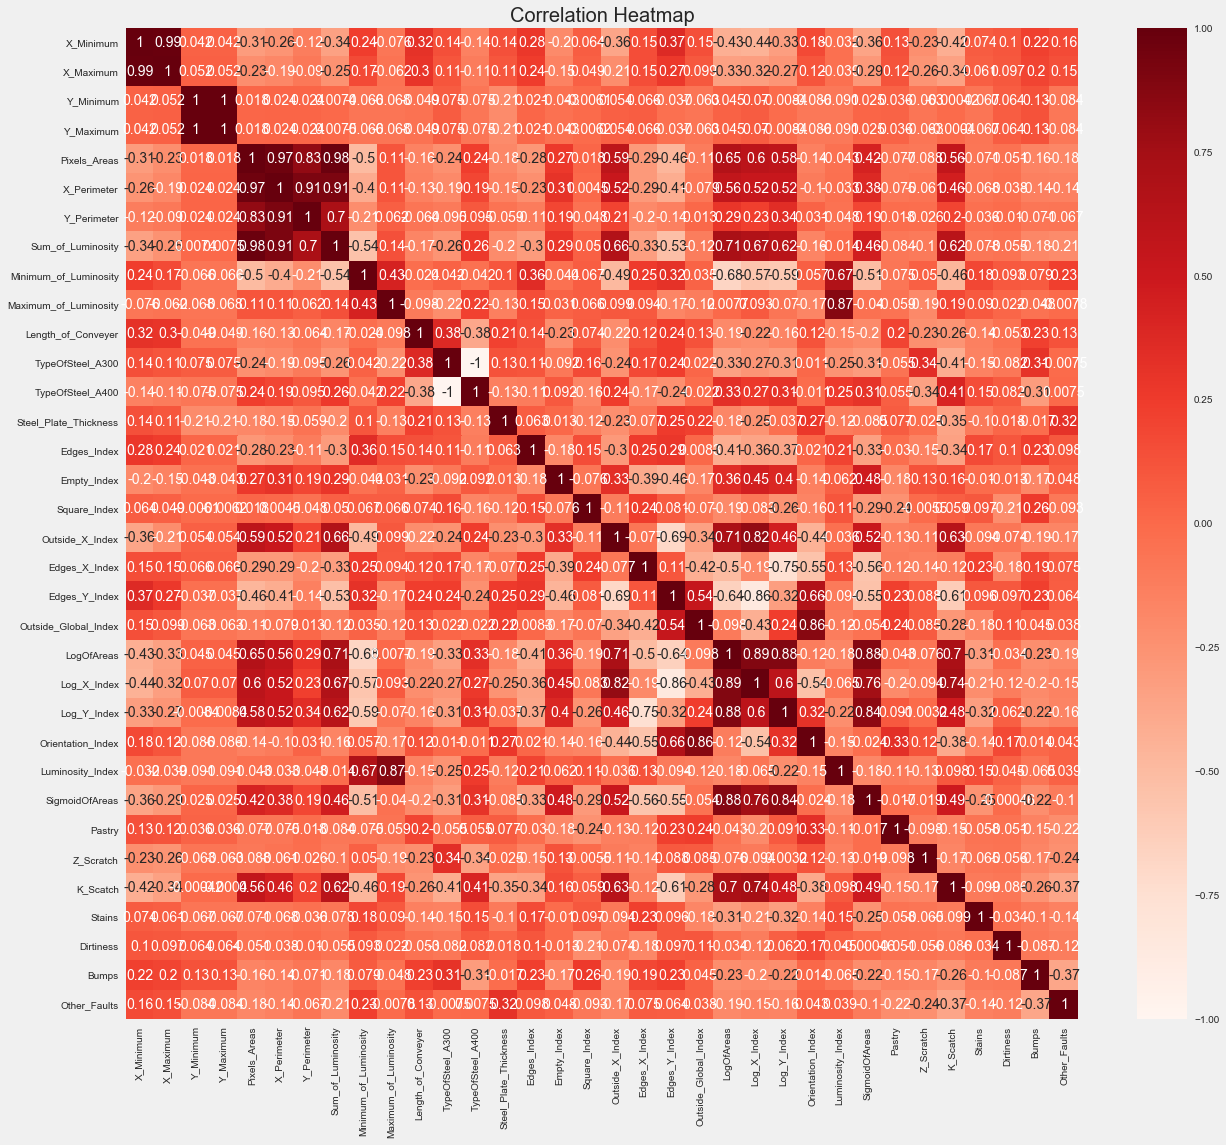

In [42]:
plt.rcParams['figure.figsize'] = (19, 17)
plt.style.use('fivethirtyeight')

sns.heatmap(data.corr(),
            cmap = 'Reds',
            annot = True)
plt.title('Correlation Heatmap', fontsize = 20)
plt.show()

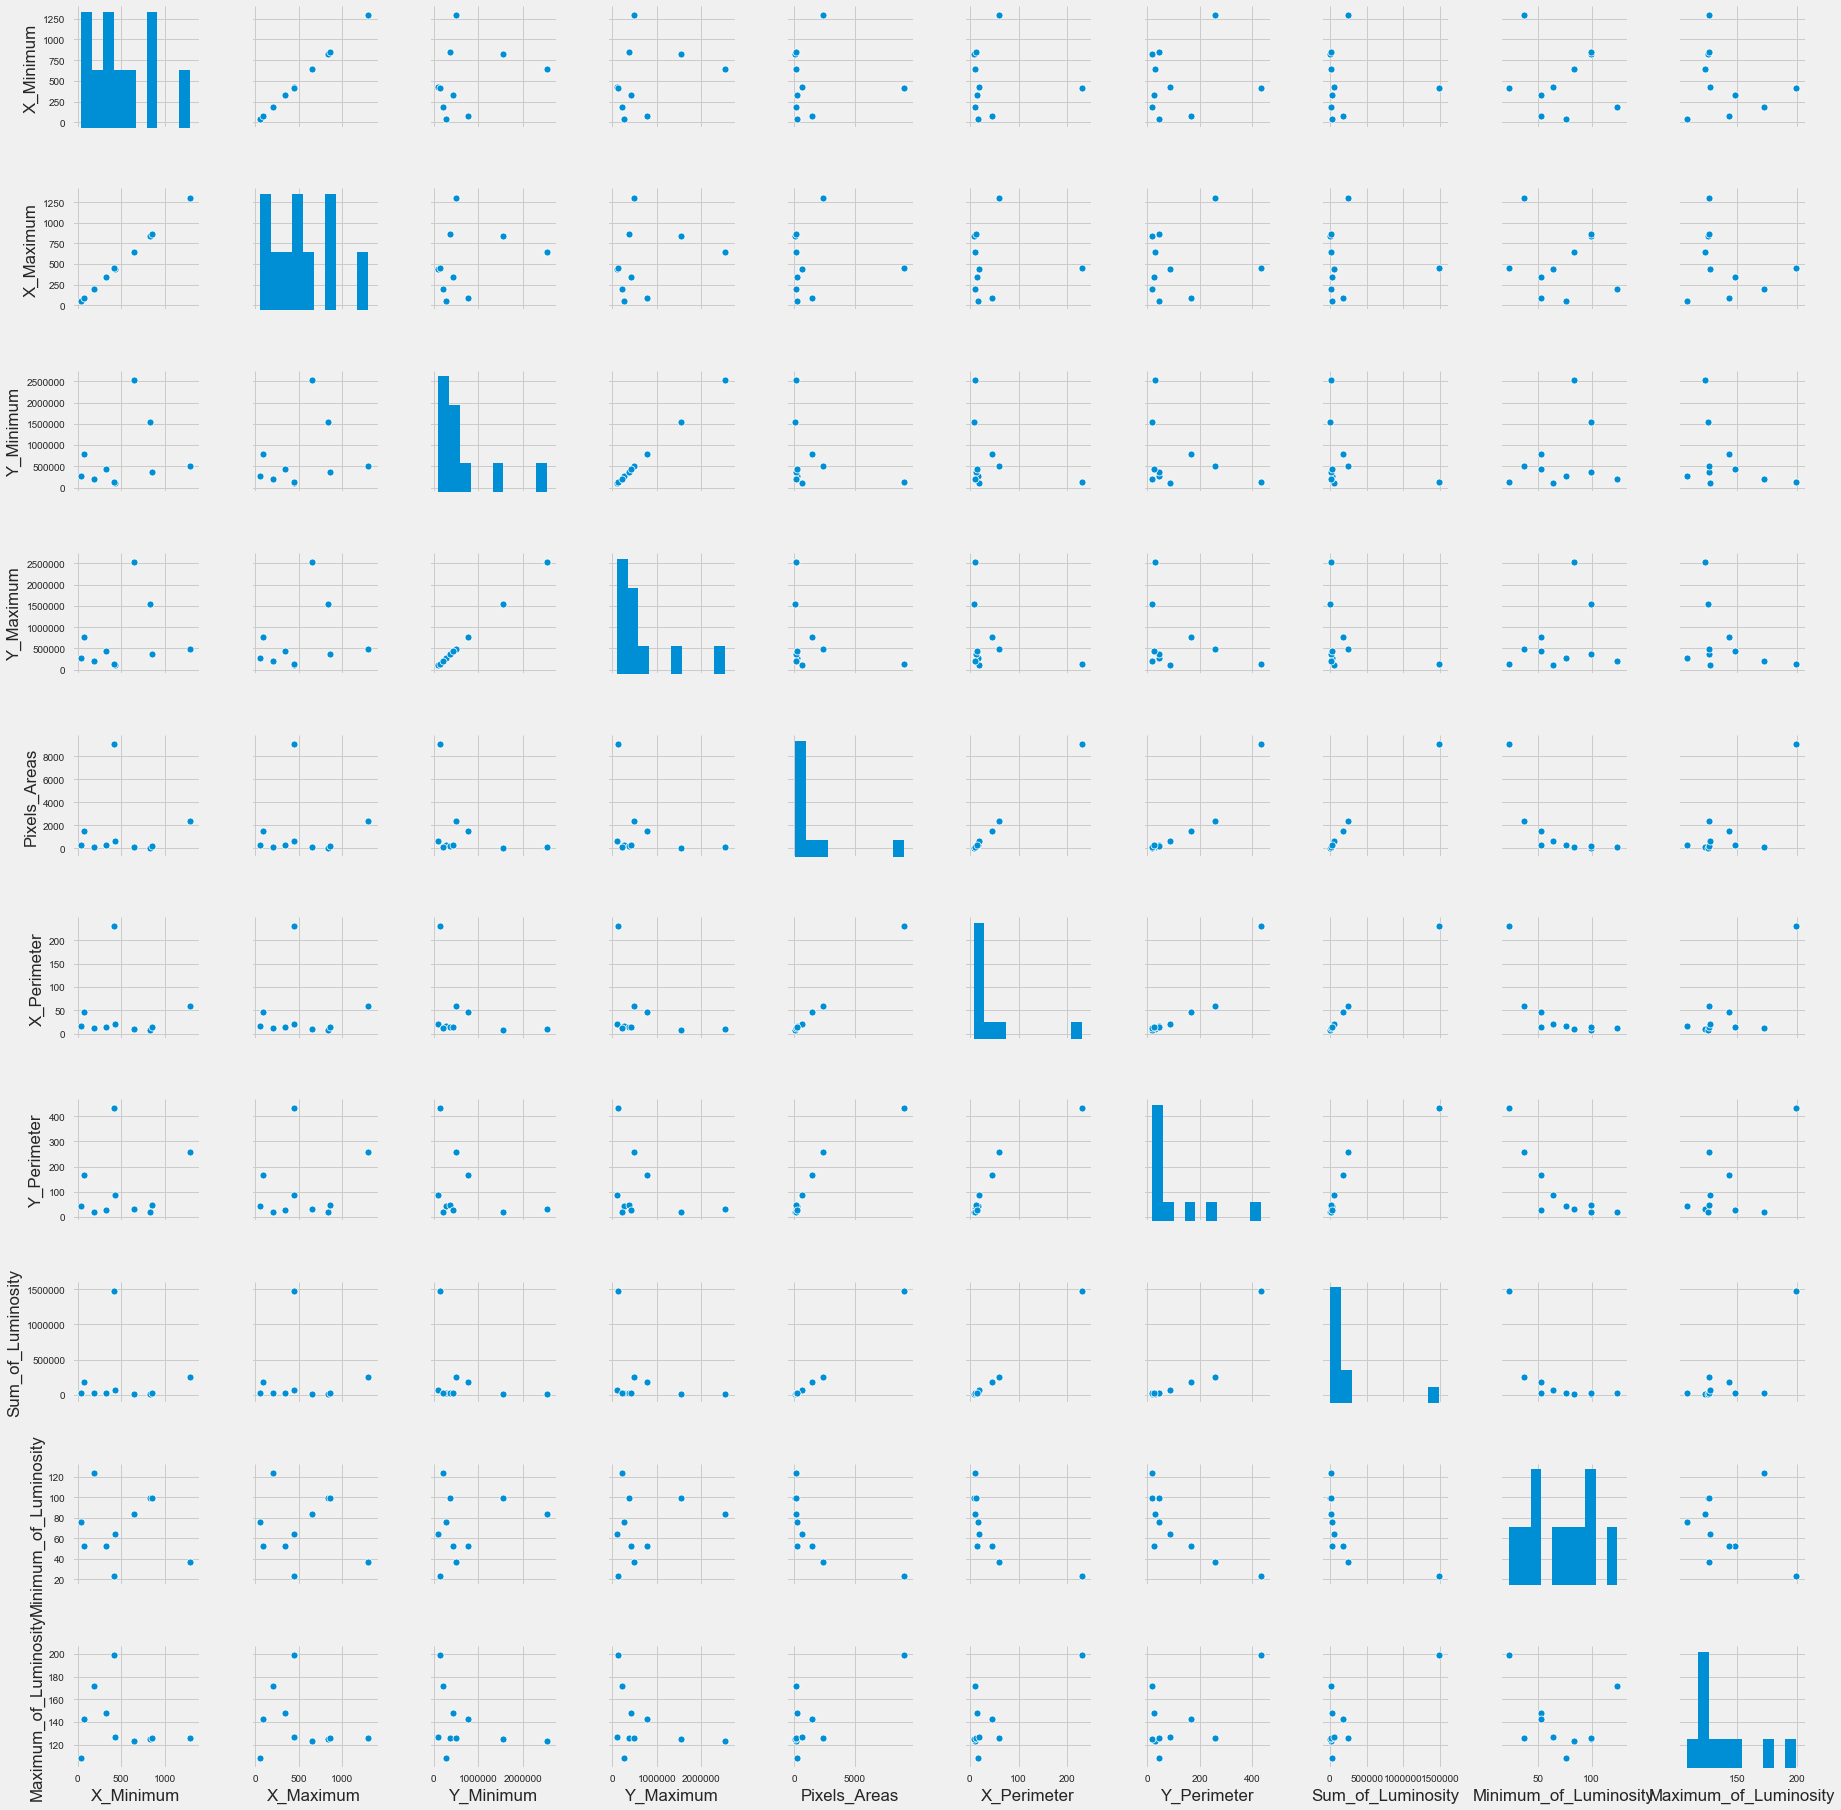

In [43]:
sns.pairplot(data.iloc[:10,:10])
plt.show()

In [44]:
data_clean = dabl.clean(data, verbose=1)

Detected feature types:
13 float, 21 int, 0 object, 0 date, 0 other
Interpreted as:
continuous      24
dirty_float      0
low_card_int     1
categorical      7
date             0
free_string      0
useless          2
dtype: int64


In [49]:
types = dabl.detect_types(data_clean)
print(types)

                       continuous  dirty_float  low_card_int  categorical  \
X_Minimum                    True        False         False        False   
X_Maximum                    True        False         False        False   
Y_Minimum                    True        False         False        False   
Y_Maximum                    True        False         False        False   
Pixels_Areas                 True        False         False        False   
X_Perimeter                  True        False         False        False   
Y_Perimeter                  True        False         False        False   
Sum_of_Luminosity            True        False         False        False   
Minimum_of_Luminosity        True        False         False        False   
Maximum_of_Luminosity        True        False         False        False   
Length_of_Conveyer           True        False         False        False   
TypeOfSteel_A300            False        False         False         True   

In [50]:
targets = data.iloc[:, 27:35]
data.drop(targets.columns, axis=1, inplace=True)
data['Target'] = targets.idxmax(1)
data.head()

X_Minimum  X_Maximum  Y_Minimum  Y_Maximum  Pixels_Areas  X_Perimeter  \
0         42         50     270900     270944           267           17   
1        645        651    2538079    2538108           108           10   
2        829        835    1553913    1553931            71            8   
3        853        860     369370     369415           176           13   
4       1289       1306     498078     498335          2409           60   

   Y_Perimeter  Sum_of_Luminosity  Minimum_of_Luminosity  \
0           44              24220                     76   
1           30              11397                     84   
2           19               7972                     99   
3           45              18996                     99   
4          260             246930                     37   

   Maximum_of_Luminosity  Length_of_Conveyer  TypeOfSteel_A300  \
0                    108                1687                 1   
1                    123                1687                 1   
2                    125                1623                 1   
3                    126                1353                 0   
4                    126                1353                 0   

   TypeOfSteel_A400  Steel_Plate_Thickness  Edges_Index  Empty_Index  \
0                 0                     80       0.0498       0.2415   
1                 0                     80       0.7647       0.3793   
2                 0                    100       0.9710       0.3426   
3                 1                    290       0.7287       0.4413   
4                 1                    185       0.0695       0.4486   

   Square_Index  Outside_X_Index  Edges_X_Index  Edges_Y_Index  \
0        0.1818           0.0047         0.4706         1.0000   
1        0.2069           0.0036         0.6000         0.9667   
2        0.3333           0.0037         0.7500         0.9474   
3        0.1556           0.0052         0.5385         1.0000   
4        0.0662           0.0126         0.2833         0.9885   

   Outside_Global_Index  LogOfAreas  Log_X_Index  Log_Y_Index  \
0                   1.0      2.4265       0.9031       1.6435   
1                   1.0      2.0334       0.7782       1.4624   
2                   1.0      1.8513       0.7782       1.2553   
3                   1.0      2.2455       0.8451       1.6532   
4                   1.0      3.3818       1.2305       2.4099   

   Orientation_Index  Luminosity_Index  SigmoidOfAreas  Target  
0             0.8182           -0.2913          0.5822  Pastry  
1             0.7931           -0.1756          0.2984  Pastry  
2             0.6667           -0.1228          0.2150  Pastry  
3             0.8444           -0.1568          0.5212  Pastry  
4             0.9338           -0.1992          1.0000  Pastry

In [51]:
origina_data = data
origina_data.columns

Index(['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas', 'Target'],
      dtype='object')

Target looks like classification
Showing only top 10 of 24 continuous features
Linear Discriminant Analysis training set score: 0.673


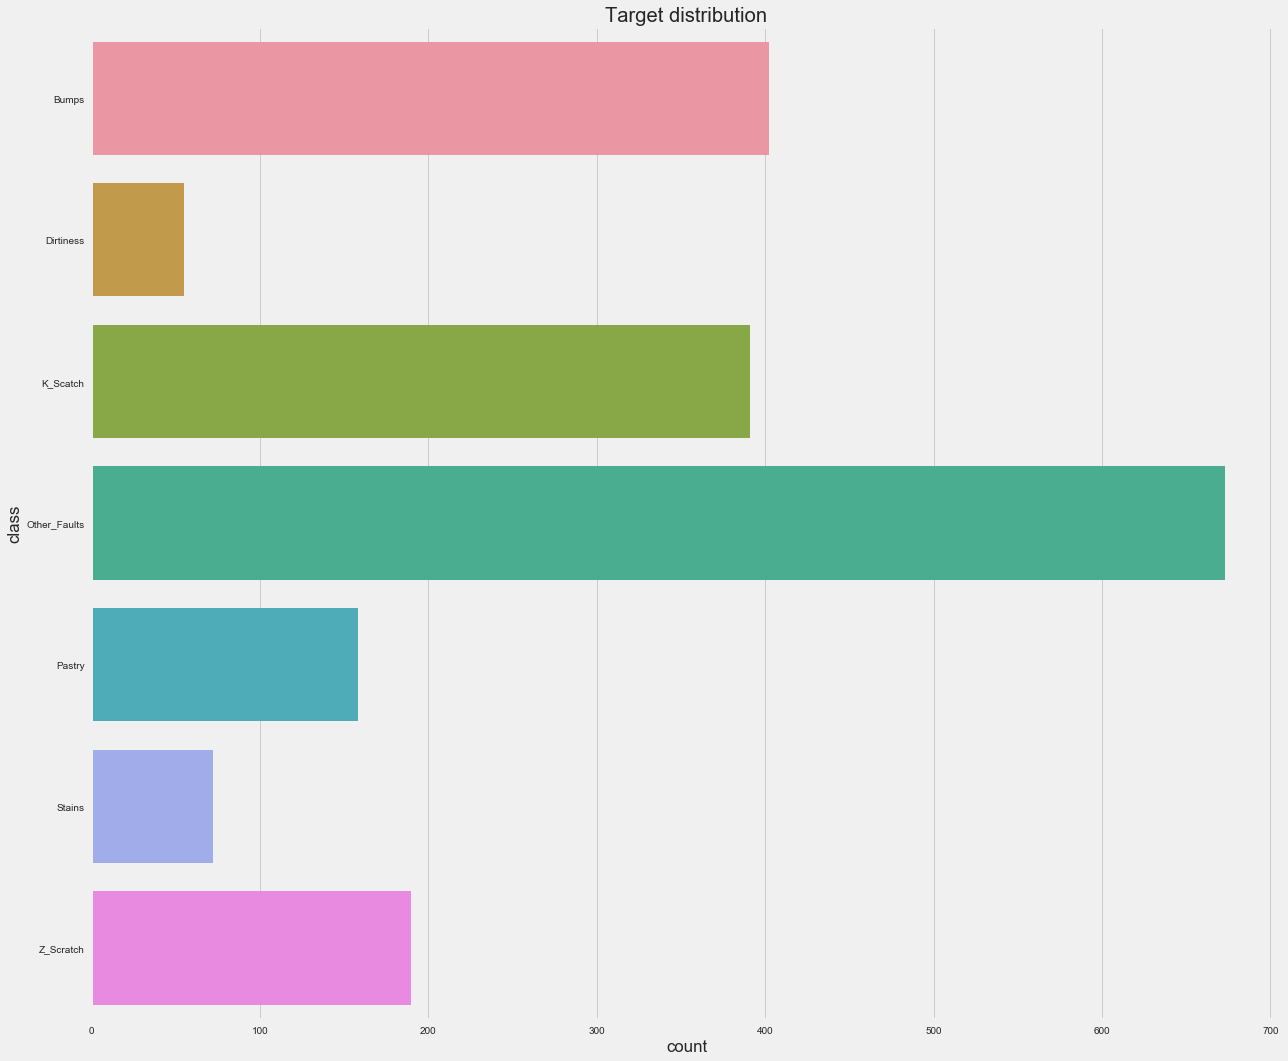

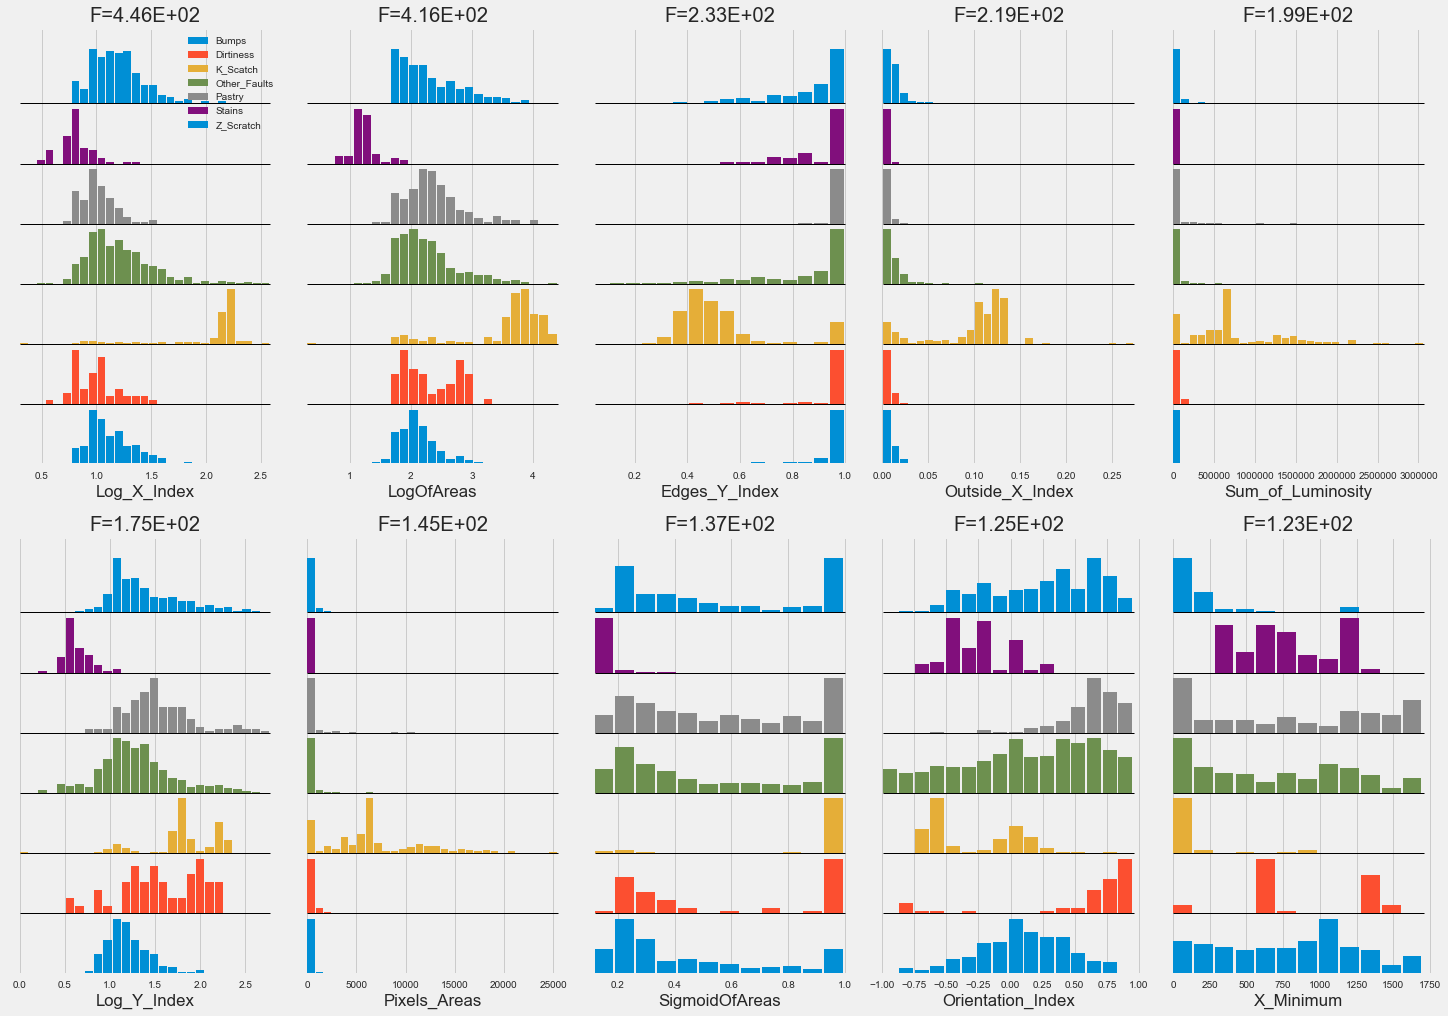

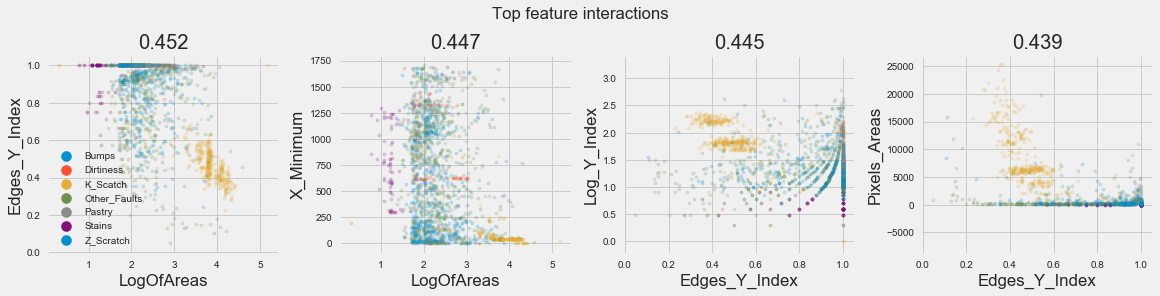

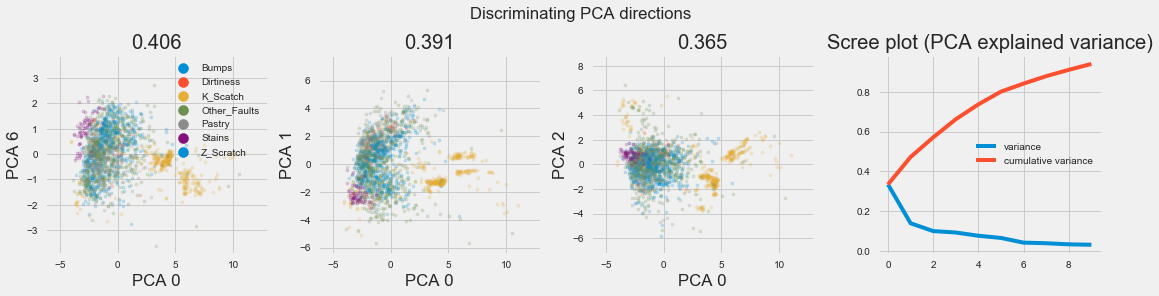

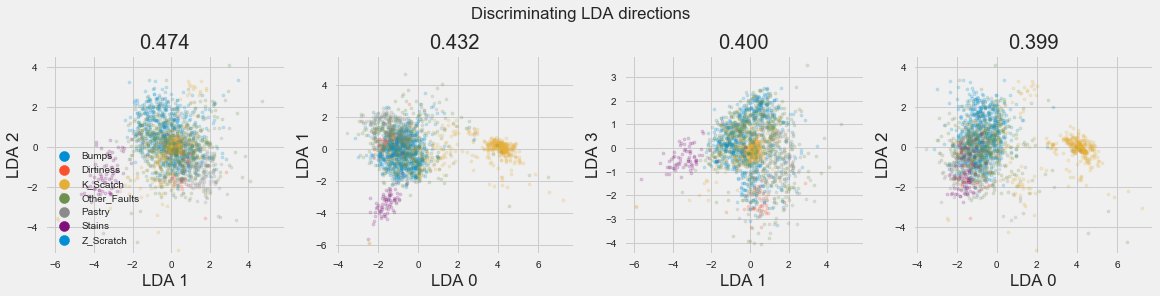

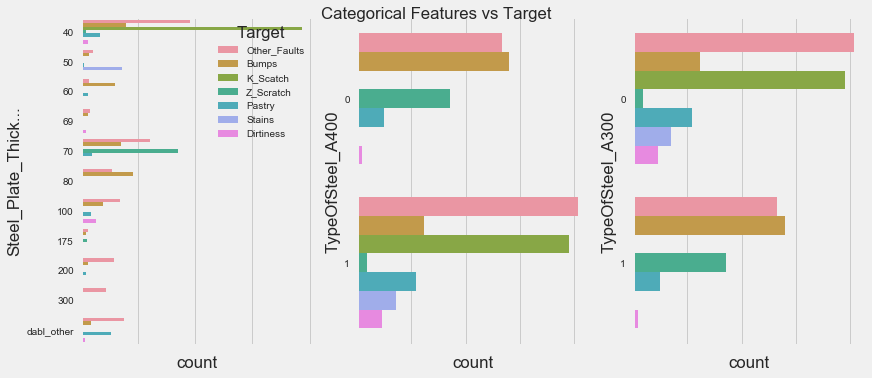

In [52]:
dabl.plot(data, target_col='Target')

In [53]:
data['TypeOfSteel_A300'] = data['TypeOfSteel_A300'].astype('category',copy=False)
data['TypeOfSteel_A400'] = data['TypeOfSteel_A400'].astype('category',copy=False)
data['Outside_Global_Index'] = data['Outside_Global_Index'].astype('category',copy=False)

In [59]:
from ipywidgets import interact_manual
plt.rcParams['figure.figsize'] = (15, 6)
plt.style.use('fivethirtyeight')

@interact_manual
def check(column1 = data.select_dtypes('number').columns,
          column2 = data.select_dtypes('number').columns[1:],
          color = ['red','black','green','blue']):
    sns.regplot(data[column1], data[column2], color = color)
    plt.show()

interactive(children=(Dropdown(description='column1', options=('X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maxim…

In [58]:
from scipy.stats import norm, skew
numeric_features = data.dtypes[data.dtypes != "object"].index

skewed_features = data[numeric_features].apply(lambda x: skew(x)).sort_values(ascending=False)

skewed_features_df = pd.DataFrame(skewed_features, columns={'Skew'})
skewed_features_df.head(10)

Skew
Y_Perimeter            39.262786
X_Perimeter            21.522802
Pixels_Areas           14.072936
Sum_of_Luminosity       7.724744
Outside_X_Index         5.177825
Y_Minimum               2.809040
Y_Maximum               2.808996
Steel_Plate_Thickness   2.205229
Maximum_of_Luminosity   1.286041
Log_X_Index             1.000240

In [60]:
skewed_features_df.tail(10)

Skew
TypeOfSteel_A300       0.406934
Empty_Index            0.293241
SigmoidOfAreas         0.125691
Square_Index          -0.056262
Minimum_of_Luminosity -0.107015
Orientation_Index     -0.153327
Edges_X_Index         -0.234914
Outside_Global_Index  -0.306185
TypeOfSteel_A400      -0.406934
Edges_Y_Index         -0.927865

In [61]:
skewed_features_df.drop(['TypeOfSteel_A400',
                         'TypeOfSteel_A300', 
                         'Outside_Global_Index'], inplace=True)

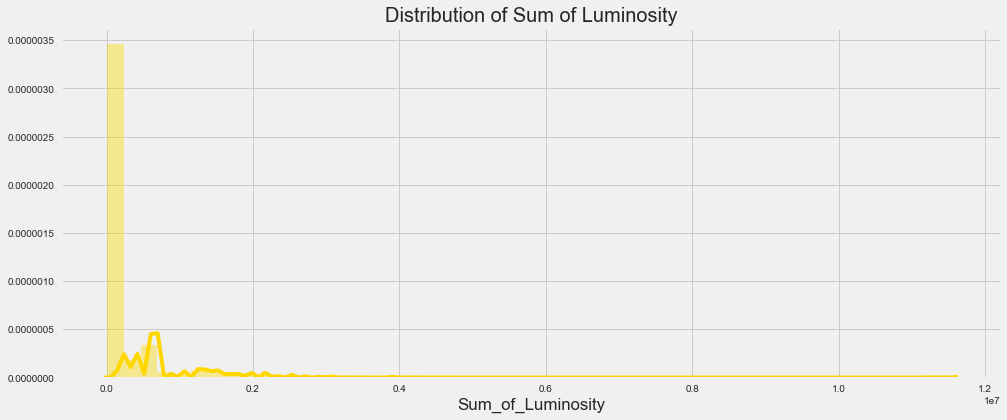

In [62]:
sns.distplot(data['Sum_of_Luminosity'], 
             color = 'gold')
plt.title('Distribution of Sum of Luminosity', fontsize = 20)
plt.show()

In [63]:
skewed_features_df = skewed_features_df[abs(skewed_features_df) > 0.75]

from scipy.special import boxcox1p
lam = 0.15
cols = skewed_features_df.index

for c in cols:
    data[c] = boxcox1p(data[c], lam)


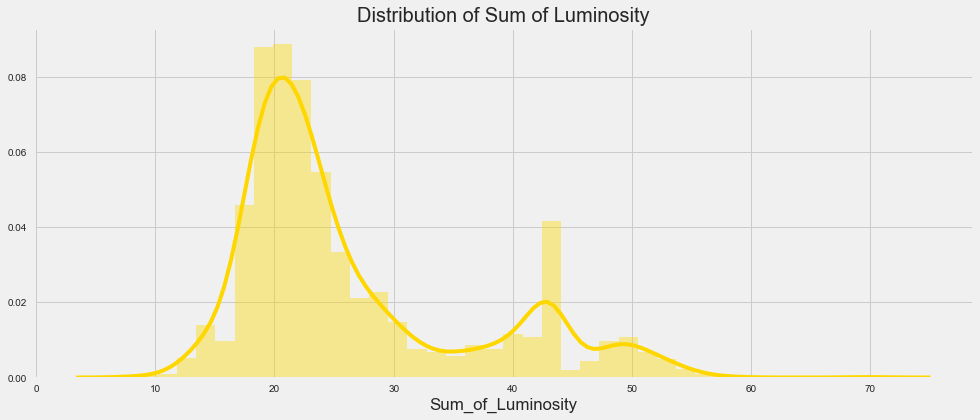

In [64]:
sns.distplot(data['Sum_of_Luminosity'], 
             color = 'gold')
plt.title('Distribution of Sum of Luminosity', fontsize = 20)
plt.show()

In [66]:
from sklearn.preprocessing import StandardScaler
features = data.drop('Target', axis=1)
target = data['Target']

scaler = StandardScaler()
features_scaled = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)
features_scaled.head()

X_Minimum  X_Maximum  Y_Minimum  Y_Maximum  Pixels_Areas  X_Perimeter  \
0  -1.120654  -1.624646  -1.053504  -1.053558     -0.202883    -0.644736   
1   0.543462   0.424953   0.825835   0.825841     -0.598533    -0.941552   
2   0.734344   0.670078   0.358130   0.358094     -0.763687    -1.056348   
3   0.756513   0.699744  -0.829160  -0.829220     -0.391966    -0.798942   
4   1.088122   1.134374  -0.602734  -0.602464      1.020129     0.192685   

   Y_Perimeter  Sum_of_Luminosity  Minimum_of_Luminosity  \
0     0.124129          -0.285926              -0.052941   
1    -0.172465          -0.612327               0.156698   
2    -0.500687          -0.754645               0.508207   
3     0.142144          -0.395179               0.508207   
4     1.770064           0.986082              -1.463624   

   Maximum_of_Luminosity  Length_of_Conveyer  TypeOfSteel_A300  \
0              -1.242952            1.570439          1.223956   
1              -0.340684            1.570439          1.223956   
2              -0.227493            1.159610          1.223956   
3              -0.171469           -0.741385         -0.817023   
4              -0.171469           -0.741385         -0.817023   

   TypeOfSteel_A400  Steel_Plate_Thickness  Edges_Index  Empty_Index  \
0         -1.223956               0.289100    -0.987606    -1.291934   
1         -1.223956               0.289100     1.424883    -0.216649   
2         -1.223956               0.709498     1.963143    -0.493773   
3          0.817023               2.930634     1.325522     0.237590   
4          0.817023               1.948007    -0.904454     0.289974   

   Square_Index  Outside_X_Index  Edges_X_Index  Edges_Y_Index  \
0     -1.505449        -0.519330      -0.514829       0.773365   
1     -1.391072        -0.540410       0.022933       0.649673   
2     -0.844085        -0.538493       0.601860       0.577166   
3     -1.627061        -0.509754      -0.227850       0.773365   
4     -2.060481        -0.368507      -1.369309       0.730848   

   Outside_Global_Index  LogOfAreas  Log_X_Index  Log_Y_Index  \
0              0.879804    0.007070    -0.953168     0.588165   
1              0.879804   -0.545086    -1.290349     0.208984   
2              0.879804   -0.821769    -1.290349    -0.254863   
3              0.879804   -0.240087    -1.107330     0.607845   
4              0.879804    1.152609    -0.151148     1.982090   

   Orientation_Index  Luminosity_Index  SigmoidOfAreas  
0           1.103431         -0.932508        0.081904  
1           1.078679         -0.189662       -0.822893  
2           0.949358          0.120198       -1.120785  
3           1.128961         -0.077449       -0.100192  
4           1.213815         -0.333646        1.189773

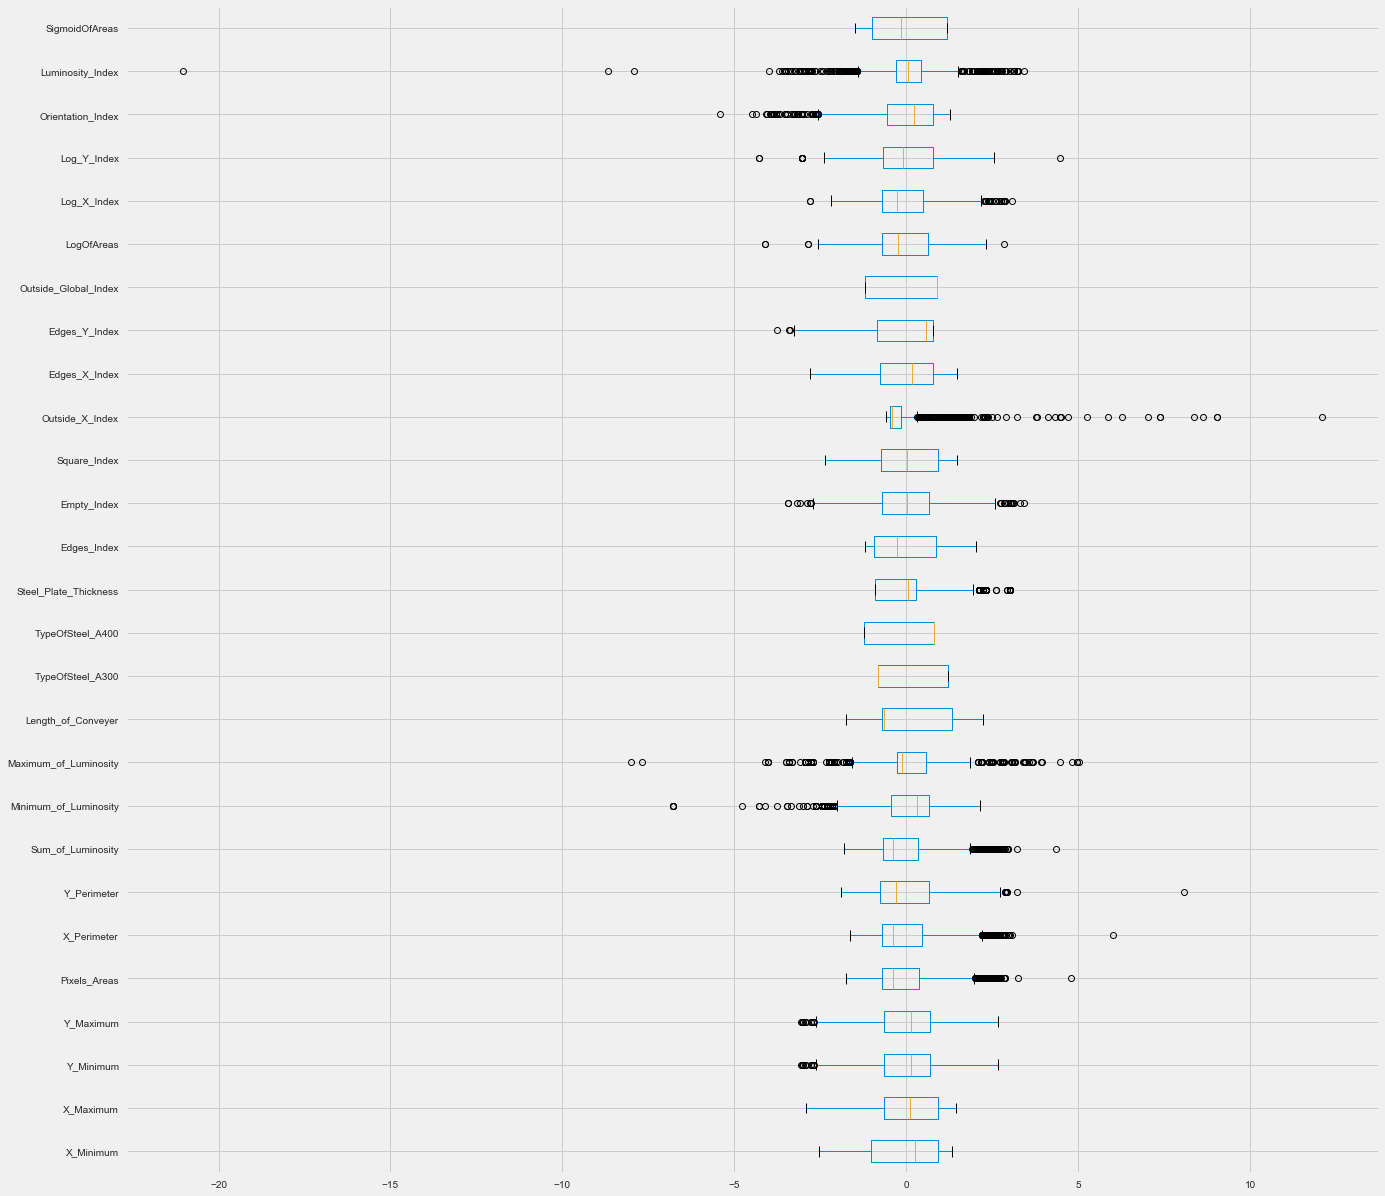

In [67]:
plt.rcParams['figure.figsize'] = (15, 25)
plt.style.use('fivethirtyeight')
data_boxplot = features_scaled.boxplot(return_type='dict',
                                       vert=False, 
                                       figsize=(20,20))

In [68]:
print(features_scaled[features_scaled['Pixels_Areas']>4])
print(features_scaled[features_scaled['Sum_of_Luminosity']>4])
print(features_scaled[features_scaled['X_Perimeter']>4])
print(features_scaled[features_scaled['Y_Perimeter']>4])

     X_Minimum  X_Maximum  Y_Minimum  Y_Maximum  Pixels_Areas  X_Perimeter  \
391  -1.480626  -0.753254    1.34255    1.34719      4.781174     6.014558   

     Y_Perimeter  Sum_of_Luminosity  Minimum_of_Luminosity  \
391     8.086639           4.365205              -6.772315   

     Maximum_of_Luminosity  Length_of_Conveyer  TypeOfSteel_A300  \
391               1.356452           -0.871564         -0.817023   

     TypeOfSteel_A400  Steel_Plate_Thickness  Edges_Index  Empty_Index  \
391          0.817023              -0.923694    -1.079451     3.408884   

     Square_Index  Outside_X_Index  Edges_X_Index  Edges_Y_Index  \
391     -2.357974         1.453717      -2.803648       0.771152   

     Outside_Global_Index  LogOfAreas  Log_X_Index  Log_Y_Index  \
391              0.879804    2.829885       1.7046     4.479892   

     Orientation_Index  Luminosity_Index  SigmoidOfAreas  
391           1.267008         -1.785098        1.189773  
     X_Minimum  X_Maximum  Y_Minimum  Y_Ma

In [69]:
data_scaled = features_scaled.copy()
data_scaled['Target'] = target

data_scaled['Target'] = pd.Categorical(data_scaled['Target'])
data_scaled['Target_Code'] = data_scaled.Target.cat.codes


In [70]:
from ipywidgets import interact_manual
plt.rcParams['figure.figsize'] = (15, 6)
plt.style.use('fivethirtyeight')

@interact_manual
def check(column1 = 'Target',
                 column2 = data_scaled.select_dtypes('number').columns,
                 themes = ['copper','summer','winter','spring','pink','bone']):
    sns.boxplot(data_scaled[column1], 
                data_scaled[column2],
                palette = themes)
    plt.show()

interactive(children=(Text(value='Target', description='column1'), Dropdown(description='column2', options=('X…

In [71]:
from ipywidgets import interact_manual
plt.rcParams['figure.figsize'] = (15, 6)
plt.style.use('fivethirtyeight')

@interact_manual
def check(column1 = 'Target',
                 column2 = data_scaled.select_dtypes('number').columns[1:],
                 themes = ['summer','winter','spring','pink','bone']):
    sns.violinplot(data_scaled[column1], 
                data_scaled[column2],
                palette = themes)
    plt.show()

interactive(children=(Text(value='Target', description='column1'), Dropdown(description='column2', options=('X…

In [72]:
from ipywidgets import interact_manual
plt.rcParams['figure.figsize'] = (15, 6)
plt.style.use('fivethirtyeight')

@interact_manual
def check(column1 = 'Target',
                 column2 = data_scaled.select_dtypes('number').columns[2:],
                 themes = ['winter','spring','pink','bone']):
    sns.boxenplot(data_scaled[column1], 
                data_scaled[column2],
                palette = themes)
    plt.show()

interactive(children=(Text(value='Target', description='column1'), Dropdown(description='column2', options=('Y…

In [73]:
plt.rcParams['figure.figsize'] = (15, 6)
plt.style.use('fivethirtyeight')

@interact_manual
def check(column1 = 'Target',
                 column2 = data_scaled.select_dtypes('number').columns[3:],
                 themes = ['spring','pink','bone']):
    sns.swarmplot(data_scaled[column1], 
                data_scaled[column2],
                palette = themes)
    plt.show()

interactive(children=(Text(value='Target', description='column1'), Dropdown(description='column2', options=('Y…

In [74]:
plt.rcParams['figure.figsize'] = (15, 6)
plt.style.use('fivethirtyeight')

@interact_manual
def check(column1 = 'Target',
                 column2 = data_scaled.select_dtypes('number').columns[4:],
                 themes = ['pink','bone']):
    sns.stripplot(data_scaled[column1], 
                data_scaled[column2],
                palette = themes)
    plt.show()

interactive(children=(Text(value='Target', description='column1'), Dropdown(description='column2', options=('P…

In [75]:
plt.rcParams['figure.figsize'] = (15, 6)
plt.style.use('fivethirtyeight')

@interact_manual
def check(column1 = 'Target',
                 column2 = data_scaled.select_dtypes('number').columns[5:],
                 color = ['black','red','green']):
    sns.lineplot(data_scaled[column1], 
                data_scaled[column2],
                color = color)
    plt.show()

interactive(children=(Text(value='Target', description='column1'), Dropdown(description='column2', options=('X…

# DBSCAN for Outliers Removal

In [76]:
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
dbscan_model = DBSCAN(eps=3.3, min_samples=7).fit(features_scaled)
print(Counter(dbscan_model.labels_))

Counter({0: 1846, -1: 95})


In [77]:
outliers = features_scaled[dbscan_model.labels_ == -1]
outliers.shape

(95, 27)

In [78]:
features_scaled.drop(outliers.index, axis=0, inplace=True)
target.drop(outliers.index, axis=0, inplace=True)
data_scaled.drop(outliers.index, axis=0, inplace=True)
features_scaled.shape

(1846, 27)

## PCA

In [80]:
from sklearn.decomposition import PCA
pca = PCA(random_state=101)
features_pca = pca.fit_transform(features_scaled.values)
pd.DataFrame(pca.explained_variance_ratio_, columns=['Explained Variance Ratio'])

Explained Variance Ratio
0               3.978569e-01
1               1.231157e-01
2               1.029524e-01
3               7.205521e-02
4               6.475156e-02
5               5.167241e-02
6               4.501012e-02
7               3.567701e-02
8               2.371999e-02
9               2.153396e-02
10              1.906597e-02
11              1.215045e-02
12              1.066617e-02
13              8.208449e-03
14              4.670347e-03
15              2.857887e-03
16              1.537648e-03
17              9.075729e-04
18              7.587389e-04
19              3.138498e-04
20              2.731257e-04
21              1.597247e-04
22              6.119482e-05
23              2.072687e-05
24              2.884543e-06
25              2.444566e-10
26              1.706365e-33

In [81]:
pca.explained_variance_ratio_[0:15].sum()

0.9931066464659042

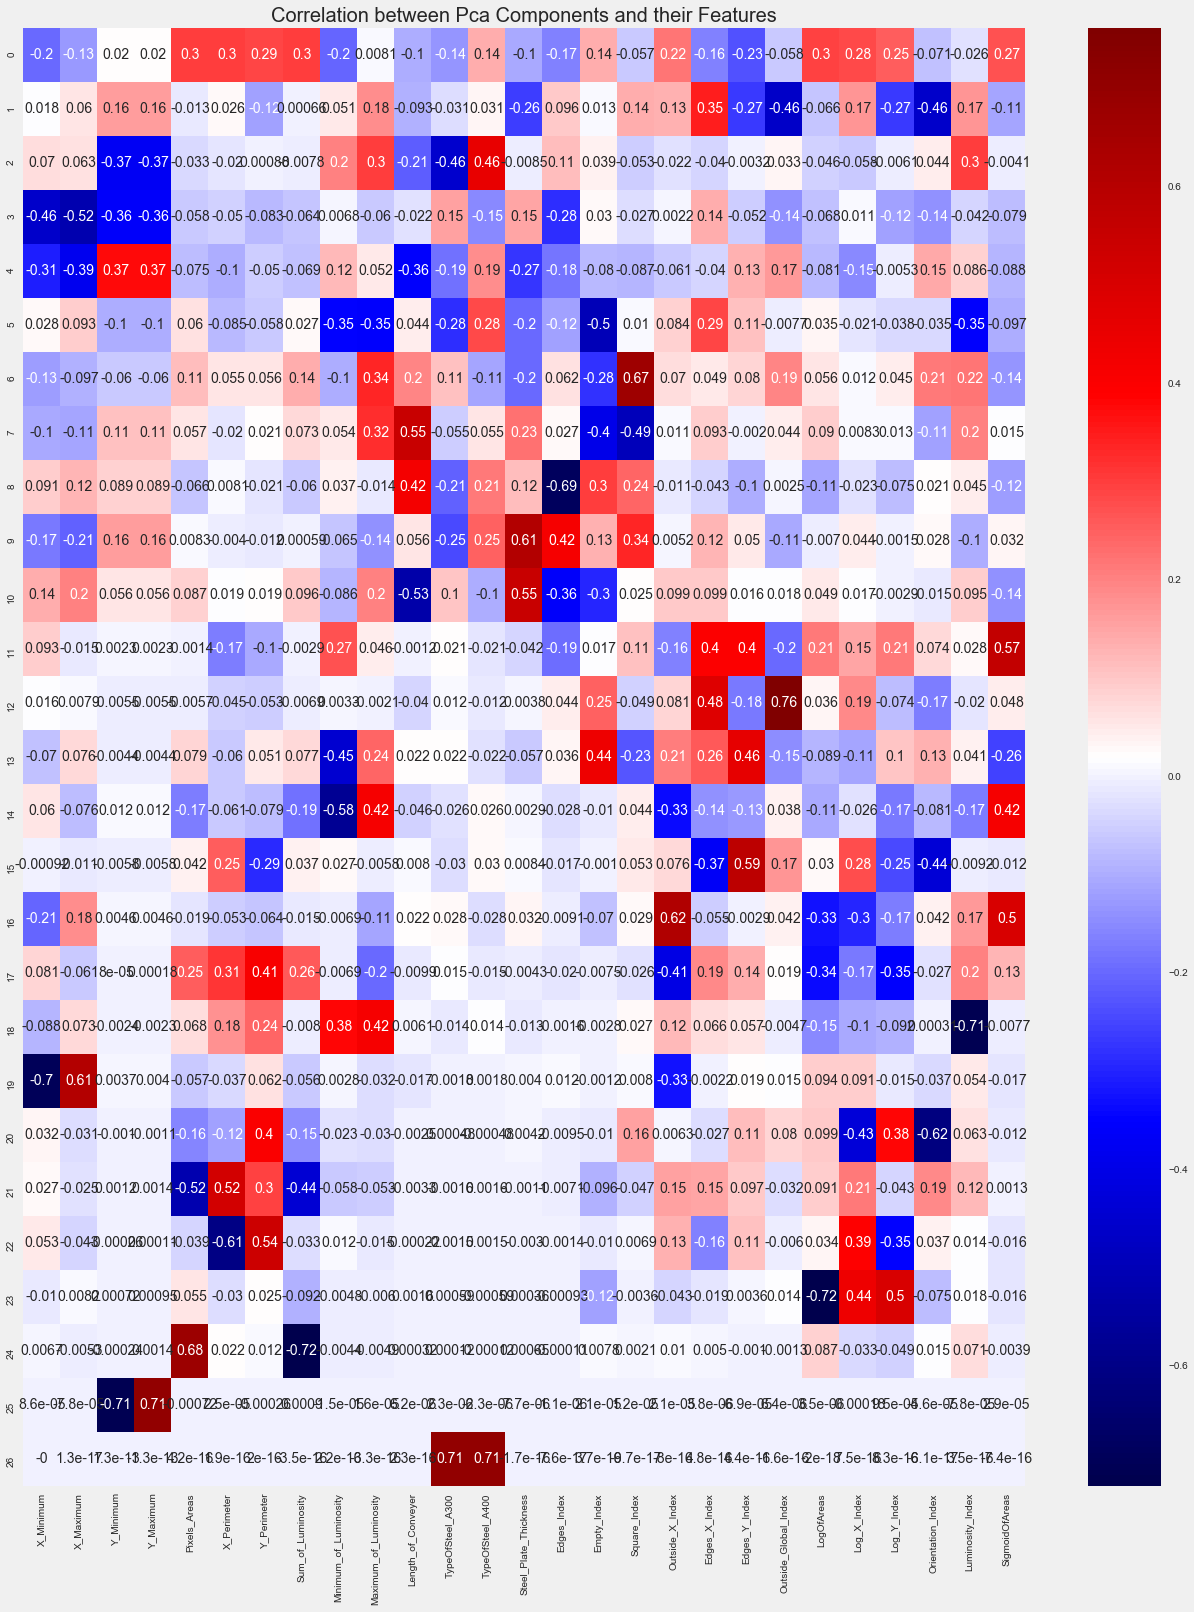

In [82]:
pca_components = pd.DataFrame(pca.components_, columns= features.columns)
plt.figure(figsize=(20,25))
sns.heatmap(pca_components,
            cmap='seismic', 
            annot = True)
plt.title('Correlation between Pca Components and their Features', fontsize = 20)
plt.show()

In [83]:
def pca_dataset(features, n_components):
    
    pca_n = PCA(n_components=n_components, random_state=101)
    features_pca_n = pca_n.fit_transform(features)
    
    column_pca = []
    for i in range(0,n_components):
        column_pca.append('Component'+np.str(i))
    return pd.DataFrame(features_pca_n, columns=column_pca)

In [84]:
data_pca15 = pca_dataset(features_scaled, n_components=15)
data_pca15['Target'] = target

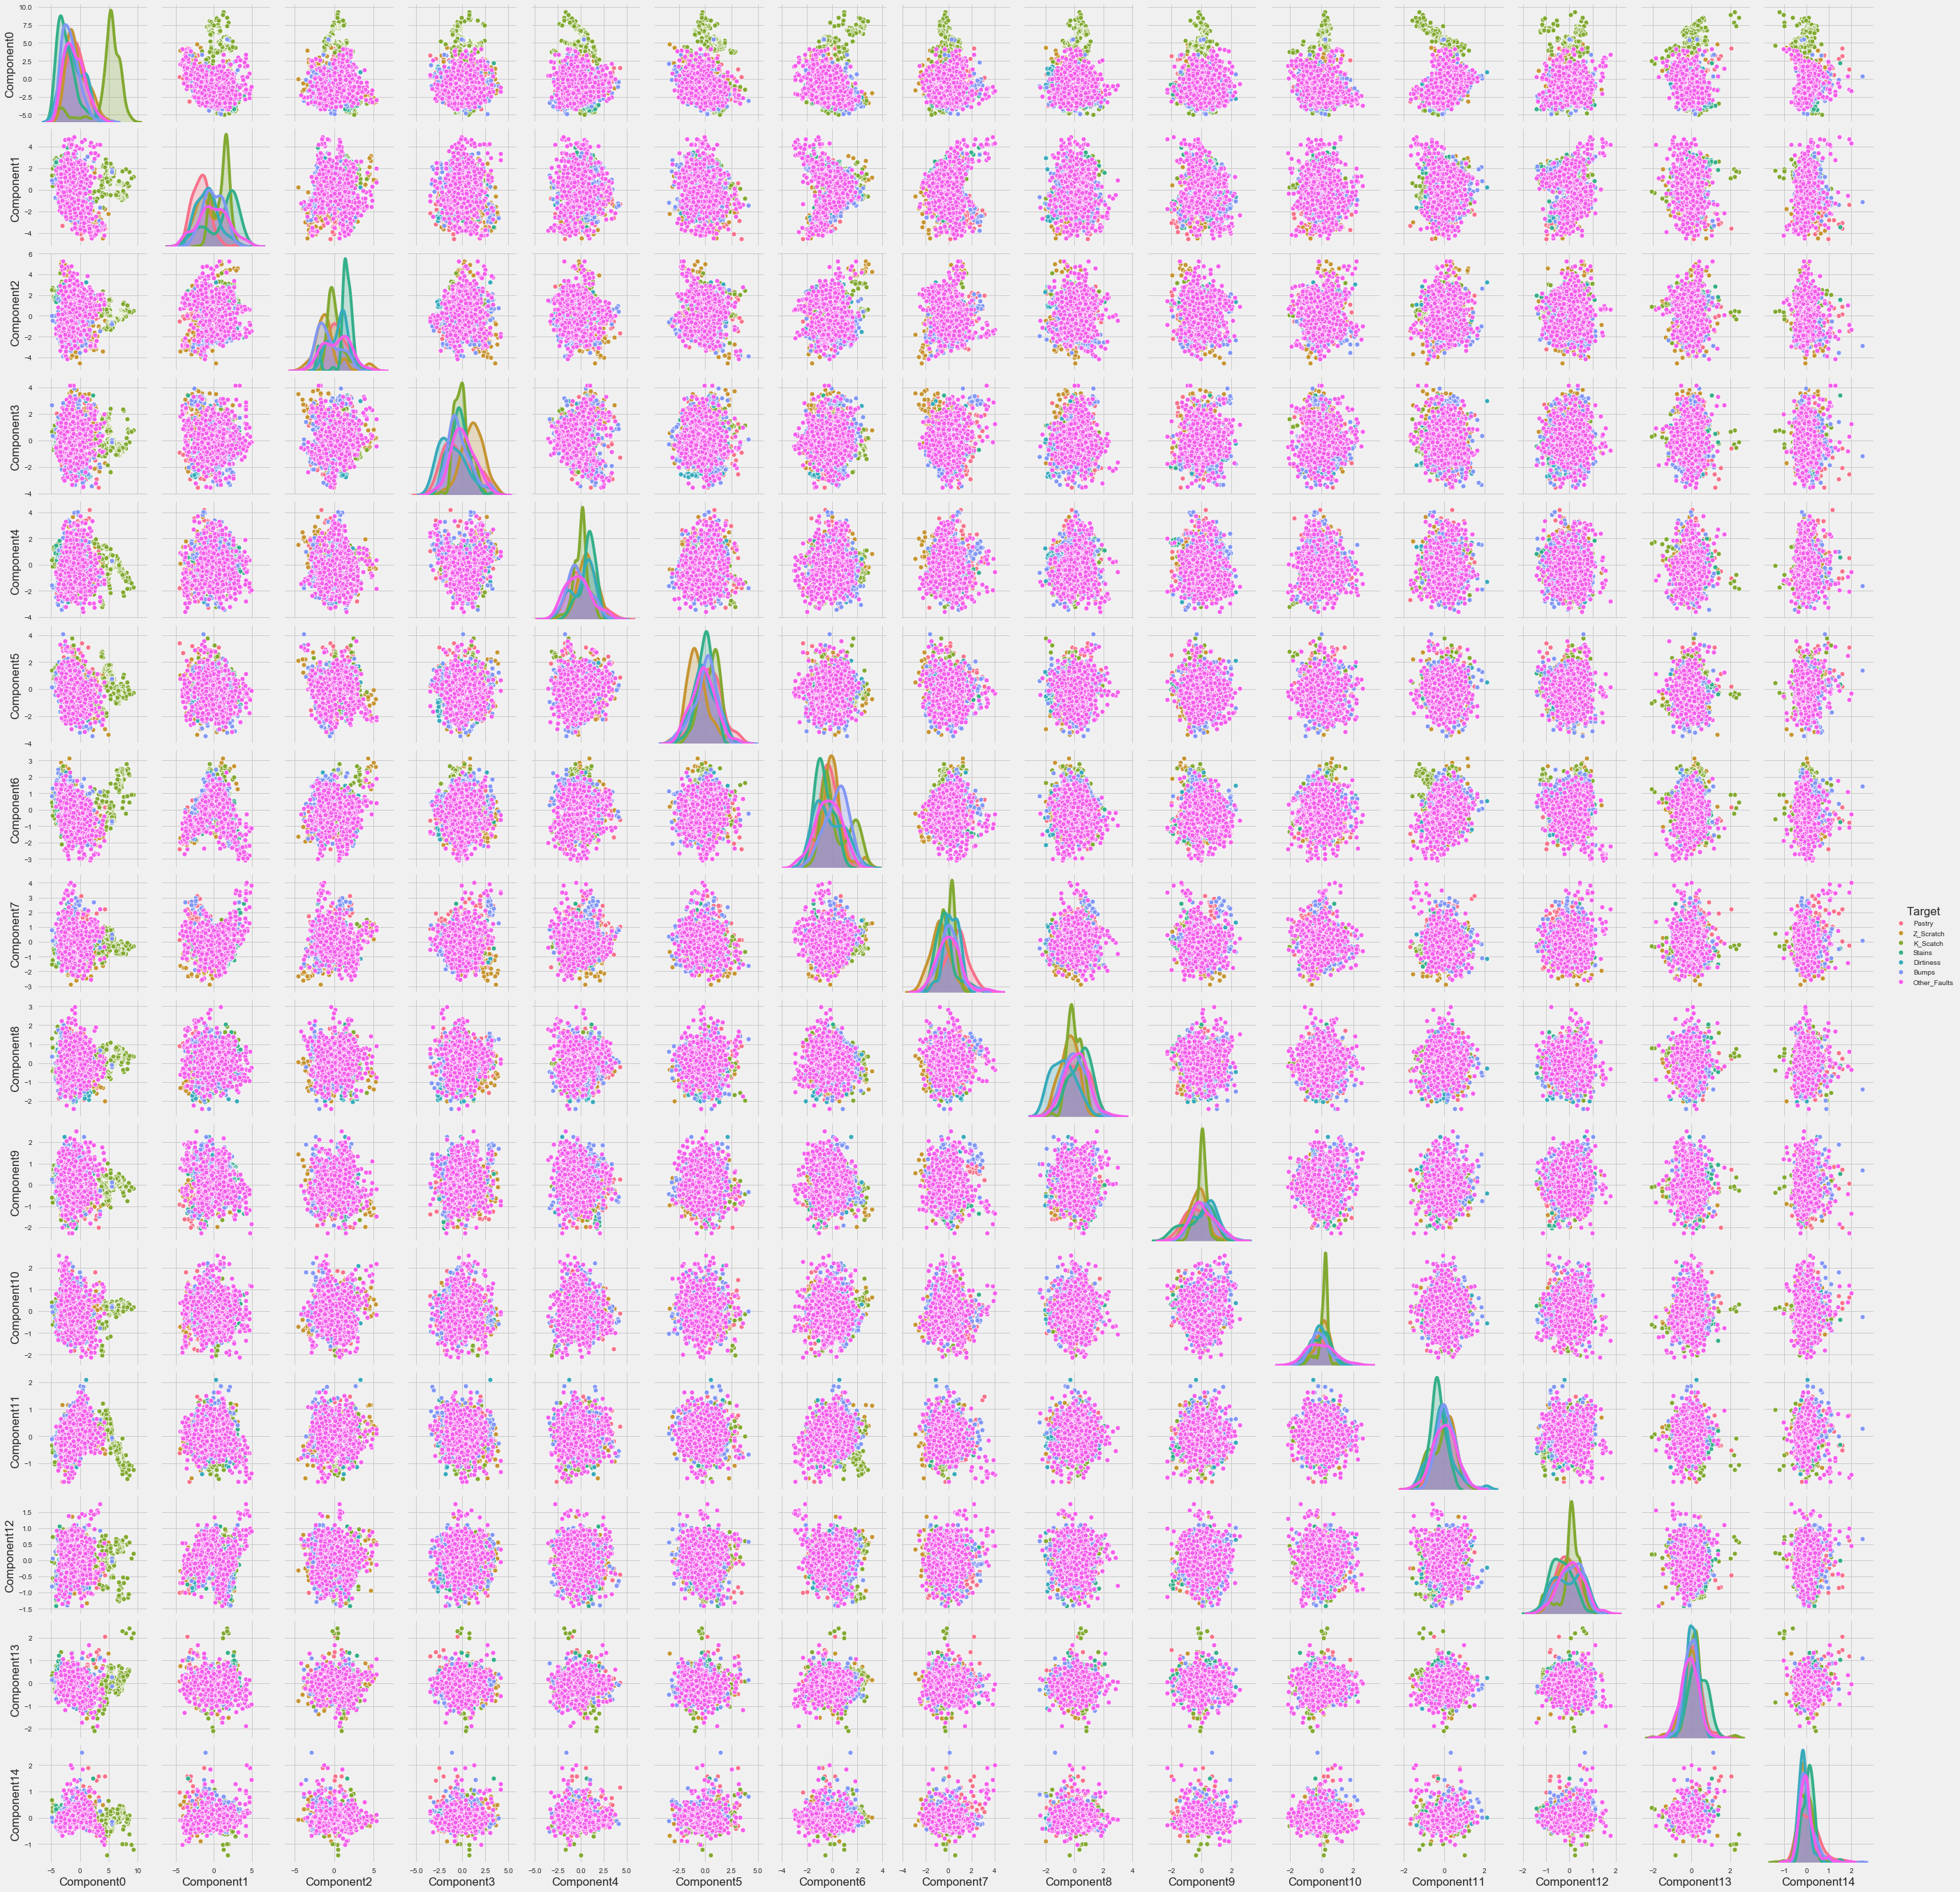

In [85]:
sns.pairplot(data_pca15, hue='Target')
plt.show()

In [86]:
pca.explained_variance_ratio_[0:5].sum()

0.7607317672293302

In [87]:
data_pca5 = pca_dataset(features_scaled, n_components=5)
data_pca5['Target'] = target

In [88]:
data_pca15['Target'] = pd.Categorical(data_pca15['Target'])
data_pca15['Target_Code'] = data_pca15.Target.cat.codes

data_pca5['Target'] = pd.Categorical(data_pca5['Target'])
data_pca5['Target_Code'] = data_pca5.Target.cat.codes

## Clustering Analysis

### Grouping with K-Means Clustering

* The K-Means clustering algorithm is a simple unsupervised algorithm that's used for quickly predicting groupings.

* Now let's take a look at the groups that we can identify by K-Means. We already know that we have 7 types of fault. Therefore, we can consider the number of clusters to be 7.

In [89]:
kmeans_model = KMeans(n_clusters=7, random_state=54)
kmeans_model.fit(features_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=54, tol=0.0001, verbose=0)

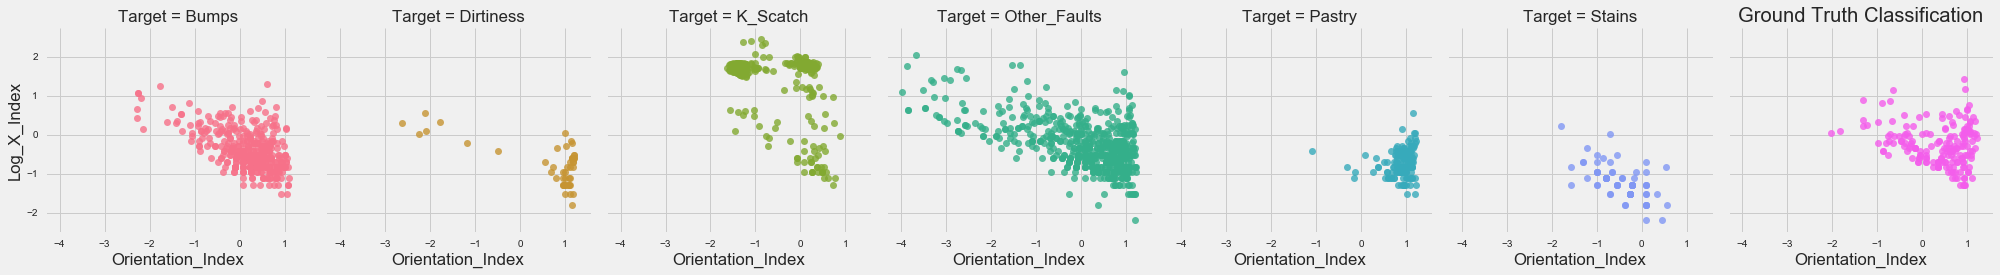

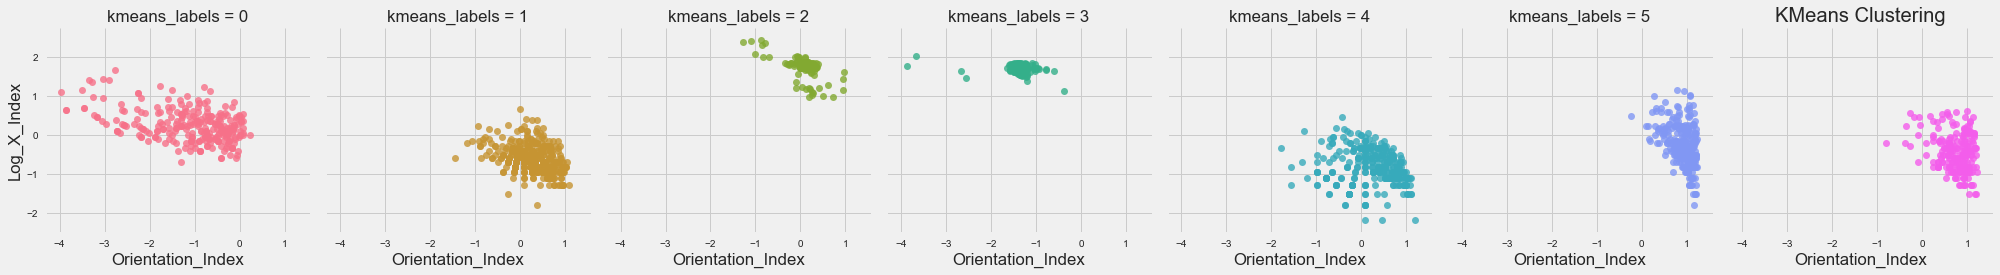

In [90]:
kmeans_labels = np.choose(kmeans_model.labels_, [0,1,2,3,4,5,6]).astype(np.int64)
data_scaled['kmeans_labels'] = kmeans_labels

color_themes = {0:'#8d99ae',1:'#ffe066', 2:'#f77f00',3:'#348aa7',4:'#bce784',5:'#ffcc99',  6:'#f25f5c'}


sns.lmplot(x='Orientation_Index',
           y='Log_X_Index',
           data=data_scaled,
           fit_reg=False,
           hue='Target',
           col='Target',
           size=4)
plt.title("Ground Truth Classification")

sns.lmplot(x='Orientation_Index',
           y='Log_X_Index',
           data=data_scaled,
           fit_reg=False,
           hue='kmeans_labels',
           col='kmeans_labels',
           size=4)
plt.title("KMeans Clustering")
plt.show()

In [92]:
from sklearn.metrics import classification_report
print(classification_report(data_scaled['Target_Code'], kmeans_labels))

              precision    recall  f1-score   support

           0       0.21      0.14      0.17       396
           1       0.01      0.04      0.01        53
           2       0.97      0.34      0.51       374
           3       0.04      0.01      0.02       615
           4       0.06      0.14      0.09       149
           5       0.00      0.00      0.00        72
           6       0.45      0.54      0.49       187

    accuracy                           0.17      1846
   macro avg       0.25      0.17      0.18      1846
weighted avg       0.31      0.17      0.20      1846



In [93]:
kmeans_model_pca15 = KMeans(n_clusters=7, random_state=54)
kmeans_model_pca15.fit(data_pca15.drop(['Target','Target_Code'], axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=54, tol=0.0001, verbose=0)

In [94]:
kmeans_labels_pca15 = np.choose(kmeans_model.labels_, [0,1,2,3,4,5,6]).astype(np.int64)
data_pca15['kmeans_labels'] = kmeans_labels_pca15

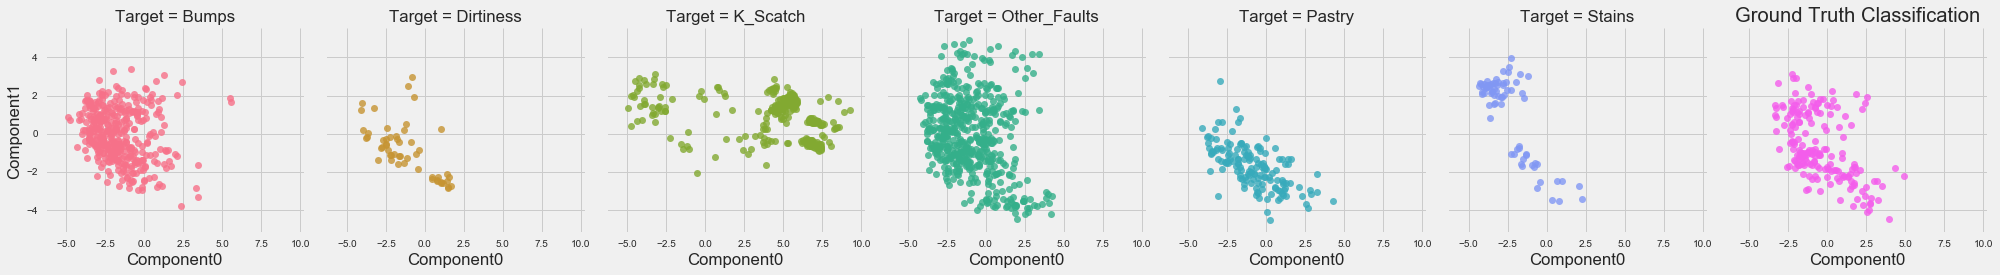

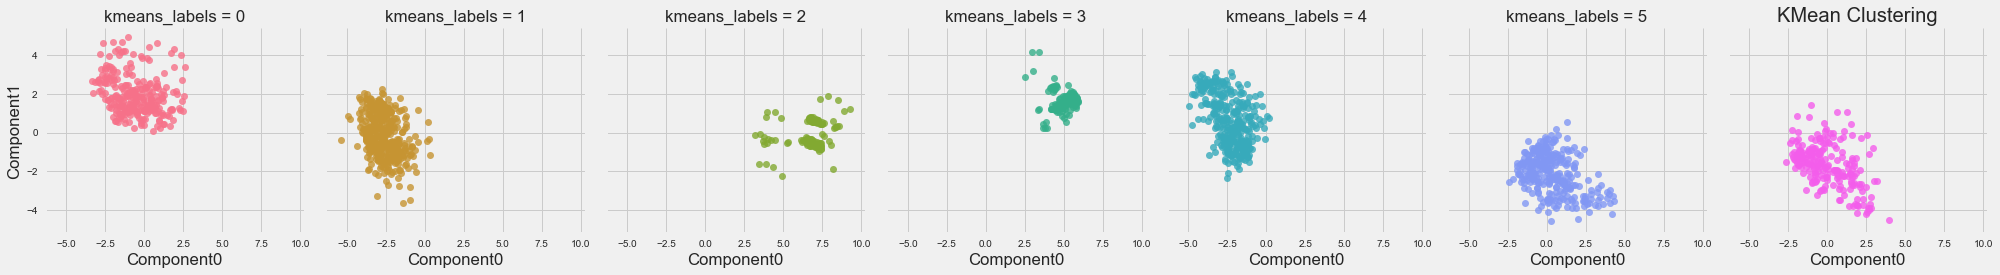

In [95]:
sns.lmplot(x='Component0',
           y='Component1',
           data=data_pca15,
           fit_reg=False, 
           hue='Target',
           col='Target',
           size=4)
plt.title("Ground Truth Classification")

sns.lmplot(x='Component0',
           y='Component1',
           data=data_pca15, 
           fit_reg=False, 
           hue='kmeans_labels',
           col='kmeans_labels',
           size=4)
plt.title("KMean Clustering")
plt.show()

In [96]:
print(classification_report(data_pca15['Target_Code'], kmeans_model_pca15.labels_))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        91
           0       0.13      0.10      0.11       396
           1       0.03      0.25      0.06        53
           2       0.13      0.12      0.12       374
           3       0.21      0.09      0.12       524
           4       0.00      0.00      0.00       149
           5       0.00      0.00      0.00        72
           6       0.15      0.22      0.18       187

    accuracy                           0.10      1846
   macro avg       0.08      0.10      0.08      1846
weighted avg       0.13      0.10      0.10      1846



In [97]:
kmeans_model_pca5 = KMeans(n_clusters=7, random_state=54)
kmeans_model_pca5.fit(data_pca5.drop(['Target','Target_Code'], axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=54, tol=0.0001, verbose=0)

In [98]:
print(classification_report(data_pca5['Target_Code'], kmeans_model_pca15.labels_))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        91
           0       0.13      0.10      0.11       396
           1       0.03      0.25      0.06        53
           2       0.13      0.12      0.12       374
           3       0.21      0.09      0.12       524
           4       0.00      0.00      0.00       149
           5       0.00      0.00      0.00        72
           6       0.15      0.22      0.18       187

    accuracy                           0.10      1846
   macro avg       0.08      0.10      0.08      1846
weighted avg       0.13      0.10      0.10      1846



## Hierarchial Clustering Analysis

In [99]:
origina_data.columns

Index(['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas', 'Target'],
      dtype='object')

In [113]:
original_features = origina_data.drop(['Target'], axis=1).copy()
origina_data['Target']=origina_data['Target'].reset_index(drop=True)
origina_data['Target'] = pd.Categorical(origina_data['Target'], ordered=True, categories=['Other_Faults', 'Bumps', 'K_Scatch','Z_Scratch','Pastry','Stains','Dirtiness'])
origina_data['Target_Code'] = origina_data.Target.cat.codes

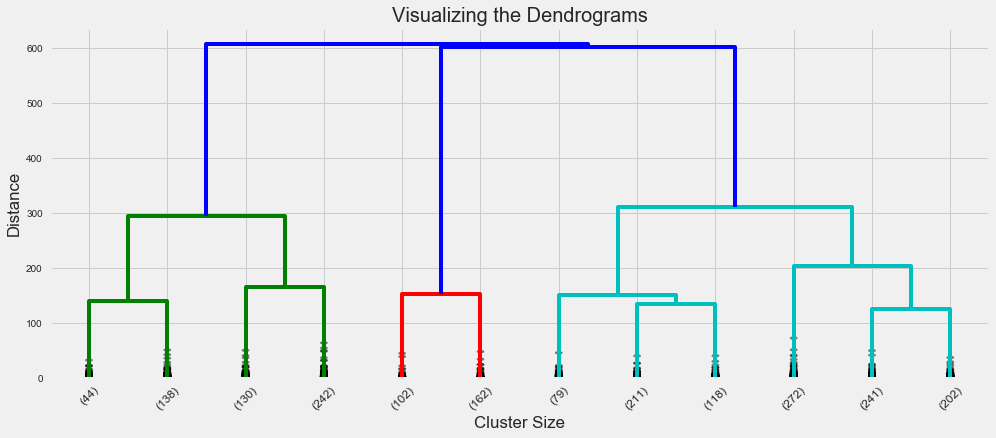

In [115]:
from scipy.cluster.hierarchy import dendrogram, linkage
linkage_model = linkage(original_features, method='ward')
dendrogram(linkage_model, truncate_mode='lastp', p=12, leaf_rotation=45, leaf_font_size=12, show_contracted=True)
plt.title('Truncated Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')

plt.axhline(y=0.4*10**(8))
plt.axhline(y=0.2*10**(8))
plt.title('Visualizing the Dendrograms', fontsize = 20)
plt.show()

In [118]:
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from sklearn.metrics import accuracy_score

In [119]:
k = 7
h_clustering = AgglomerativeClustering(n_clusters=k, 
                                       affinity='euclidean', 
                                       linkage='ward')
h_clustering.fit(original_features)

accuracy_score(origina_data['Target_Code'], h_clustering.labels_)

0.11385883565172591

In [120]:
h_clustering = AgglomerativeClustering(n_clusters=k,
                                       affinity='manhattan',
                                       linkage='complete' )
h_clustering.fit(original_features)

accuracy_score(origina_data['Target_Code'], h_clustering.labels_)

0.07109737248840804

In [121]:
h_clustering = AgglomerativeClustering(n_clusters=k, 
                                       affinity='manhattan',
                                       linkage='average')
h_clustering.fit(original_features)

accuracy_score(origina_data['Target_Code'], h_clustering.labels_)

0.21380731581658938

In [122]:
k = 7
h_clustering_pca5 = AgglomerativeClustering(n_clusters=k,
                                            affinity='euclidean',
                                            linkage='ward' )
h_clustering_pca5.fit(data_pca5.drop(['Target','Target_Code'], axis=1))

accuracy_score(data_pca5['Target_Code'], h_clustering_pca5.labels_)


0.09750812567713976

# Lets Build With RF

In [133]:
data = pd.read_csv('E:\Downlload\SteelDetection.csv')
data.head(10)

X_Minimum  X_Maximum  Y_Minimum  Y_Maximum  Pixels_Areas  X_Perimeter  \
0         42         50     270900     270944           267           17   
1        645        651    2538079    2538108           108           10   
2        829        835    1553913    1553931            71            8   
3        853        860     369370     369415           176           13   
4       1289       1306     498078     498335          2409           60   
5        430        441     100250     100337           630           20   
6        413        446     138468     138883          9052          230   
7        190        200     210936     210956           132           11   
8        330        343     429227     429253           264           15   
9         74         90     779144     779308          1506           46   

   Y_Perimeter  Sum_of_Luminosity  Minimum_of_Luminosity  \
0           44              24220                     76   
1           30              11397                     84   
2           19               7972                     99   
3           45              18996                     99   
4          260             246930                     37   
5           87              62357                     64   
6          432            1481991                     23   
7           20              20007                    124   
8           26              29748                     53   
9          167             180215                     53   

   Maximum_of_Luminosity  Length_of_Conveyer  TypeOfSteel_A300  \
0                    108                1687                 1   
1                    123                1687                 1   
2                    125                1623                 1   
3                    126                1353                 0   
4                    126                1353                 0   
5                    127                1387                 0   
6                    199                1687                 0   
7                    172                1687                 0   
8                    148                1687                 0   
9                    143                1687                 0   

   TypeOfSteel_A400  Steel_Plate_Thickness  Edges_Index  Empty_Index  \
0                 0                     80       0.0498       0.2415   
1                 0                     80       0.7647       0.3793   
2                 0                    100       0.9710       0.3426   
3                 1                    290       0.7287       0.4413   
4                 1                    185       0.0695       0.4486   
5                 1                     40       0.6200       0.3417   
6                 1                    150       0.4896       0.3390   
7                 1                    150       0.2253       0.3400   
8                 1                    150       0.3912       0.2189   
9                 1                    150       0.0877       0.4261   

   Square_Index  Outside_X_Index  Edges_X_Index  Edges_Y_Index  \
0        0.1818           0.0047         0.4706         1.0000   
1        0.2069           0.0036         0.6000         0.9667   
2        0.3333           0.0037         0.7500         0.9474   
3        0.1556           0.0052         0.5385         1.0000   
4        0.0662           0.0126         0.2833         0.9885   
5        0.1264           0.0079         0.5500         1.0000   
6        0.0795           0.0196         0.1435         0.9607   
7        0.5000           0.0059         0.9091         1.0000   
8        0.5000           0.0077         0.8667         1.0000   
9        0.0976           0.0095         0.3478         0.9820   

   Outside_Global_Index  LogOfAreas  Log_X_Index  Log_Y_Index  \
0                   1.0      2.4265       0.9031       1.6435   
1                   1.0      2.0334       0.7782       1.4624   
2                   1.0      1.8513       0.7782       1.2553  

In [124]:
targets = data.iloc[:, 27:35]
data.drop(targets.columns, axis=1, inplace=True)
data['Target'] = targets.idxmax(1)
data.head()

X_Minimum  X_Maximum  Y_Minimum  Y_Maximum  Pixels_Areas  X_Perimeter  \
0         42         50     270900     270944           267           17   
1        645        651    2538079    2538108           108           10   
2        829        835    1553913    1553931            71            8   
3        853        860     369370     369415           176           13   
4       1289       1306     498078     498335          2409           60   

   Y_Perimeter  Sum_of_Luminosity  Minimum_of_Luminosity  \
0           44              24220                     76   
1           30              11397                     84   
2           19               7972                     99   
3           45              18996                     99   
4          260             246930                     37   

   Maximum_of_Luminosity  Length_of_Conveyer  TypeOfSteel_A300  \
0                    108                1687                 1   
1                    123                1687                 1   
2                    125                1623                 1   
3                    126                1353                 0   
4                    126                1353                 0   

   TypeOfSteel_A400  Steel_Plate_Thickness  Edges_Index  Empty_Index  \
0                 0                     80       0.0498       0.2415   
1                 0                     80       0.7647       0.3793   
2                 0                    100       0.9710       0.3426   
3                 1                    290       0.7287       0.4413   
4                 1                    185       0.0695       0.4486   

   Square_Index  Outside_X_Index  Edges_X_Index  Edges_Y_Index  \
0        0.1818           0.0047         0.4706         1.0000   
1        0.2069           0.0036         0.6000         0.9667   
2        0.3333           0.0037         0.7500         0.9474   
3        0.1556           0.0052         0.5385         1.0000   
4        0.0662           0.0126         0.2833         0.9885   

   Outside_Global_Index  LogOfAreas  Log_X_Index  Log_Y_Index  \
0                   1.0      2.4265       0.9031       1.6435   
1                   1.0      2.0334       0.7782       1.4624   
2                   1.0      1.8513       0.7782       1.2553   
3                   1.0      2.2455       0.8451       1.6532   
4                   1.0      3.3818       1.2305       2.4099   

   Orientation_Index  Luminosity_Index  SigmoidOfAreas  Target  
0             0.8182           -0.2913          0.5822  Pastry  
1             0.7931           -0.1756          0.2984  Pastry  
2             0.6667           -0.1228          0.2150  Pastry  
3             0.8444           -0.1568          0.5212  Pastry  
4             0.9338           -0.1992          1.0000  Pastry

In [125]:
x = data.iloc[:, :-1]
y = data.iloc[:, -1]

print("Shape of X :", x.shape)
print("Shape of Y :", y.shape)

Shape of X : (1941, 27)
Shape of Y : (1941,)


In [126]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

# lets check the shapes of the dataset
print("Shape of X_train :", x_train.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of X_test :", x_test.shape)
print("Shape of y_test :", y_test.shape)

Shape of X_train : (1552, 27)
Shape of y_train : (1552,)
Shape of X_test : (389, 27)
Shape of y_test : (389,)


In [127]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train_std = sc.fit_transform(x_train)
x_test_std = sc.transform(x_test)


Training Accuracy : 1.0
Testing Accuracy : 1.0


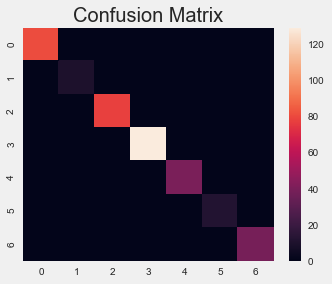

              precision    recall  f1-score   support

       Bumps       1.00      1.00      1.00        81
   Dirtiness       1.00      1.00      1.00        10
    K_Scatch       1.00      1.00      1.00        78
Other_Faults       1.00      1.00      1.00       129
      Pastry       1.00      1.00      1.00        40
      Stains       1.00      1.00      1.00        12
   Z_Scratch       1.00      1.00      1.00        39

    accuracy                           1.00       389
   macro avg       1.00      1.00      1.00       389
weighted avg       1.00      1.00      1.00       389



In [128]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model = RandomForestClassifier()
model.fit(x, y)
y_pred = model.predict(x_test)

# lets check the accuracy
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (5, 4)
sns.heatmap(cm)
plt.title('Confusion Matrix', fontsize = 20)
plt.show()

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

In [129]:
y_pred = pd.DataFrame(y_pred)
y_pred.style.bar(color = 'gold', align = 'mid')

In [130]:
prediction = model.predict(sc.transform(np.array([[45, 54, 286145, 274561, 278, 20, 50, 26001, 76, 120, 1785,
                                                  2, 0, 95, 0.05, 0.5, 0.2, 0.3, 0.0005, 0.45, 1.0, 1.785, 0.95,
                                                  1.65, 0.995, -0.39, 0.65]])))

In [131]:
print("The Type of Defect is :", prediction)

The Type of Defect is : ['Other_Faults']
